# Notebook for the compuation of the hash-based similarities

Containing methods and functionality for computing and measuring similarities from the hashes

In [1]:
from experiments.grid_resolution import plot_grid_res_layers
from experiments.disk_resolution import plot_disk_dia_layers
from experiments.disk_resolution import plot_disk_numbers


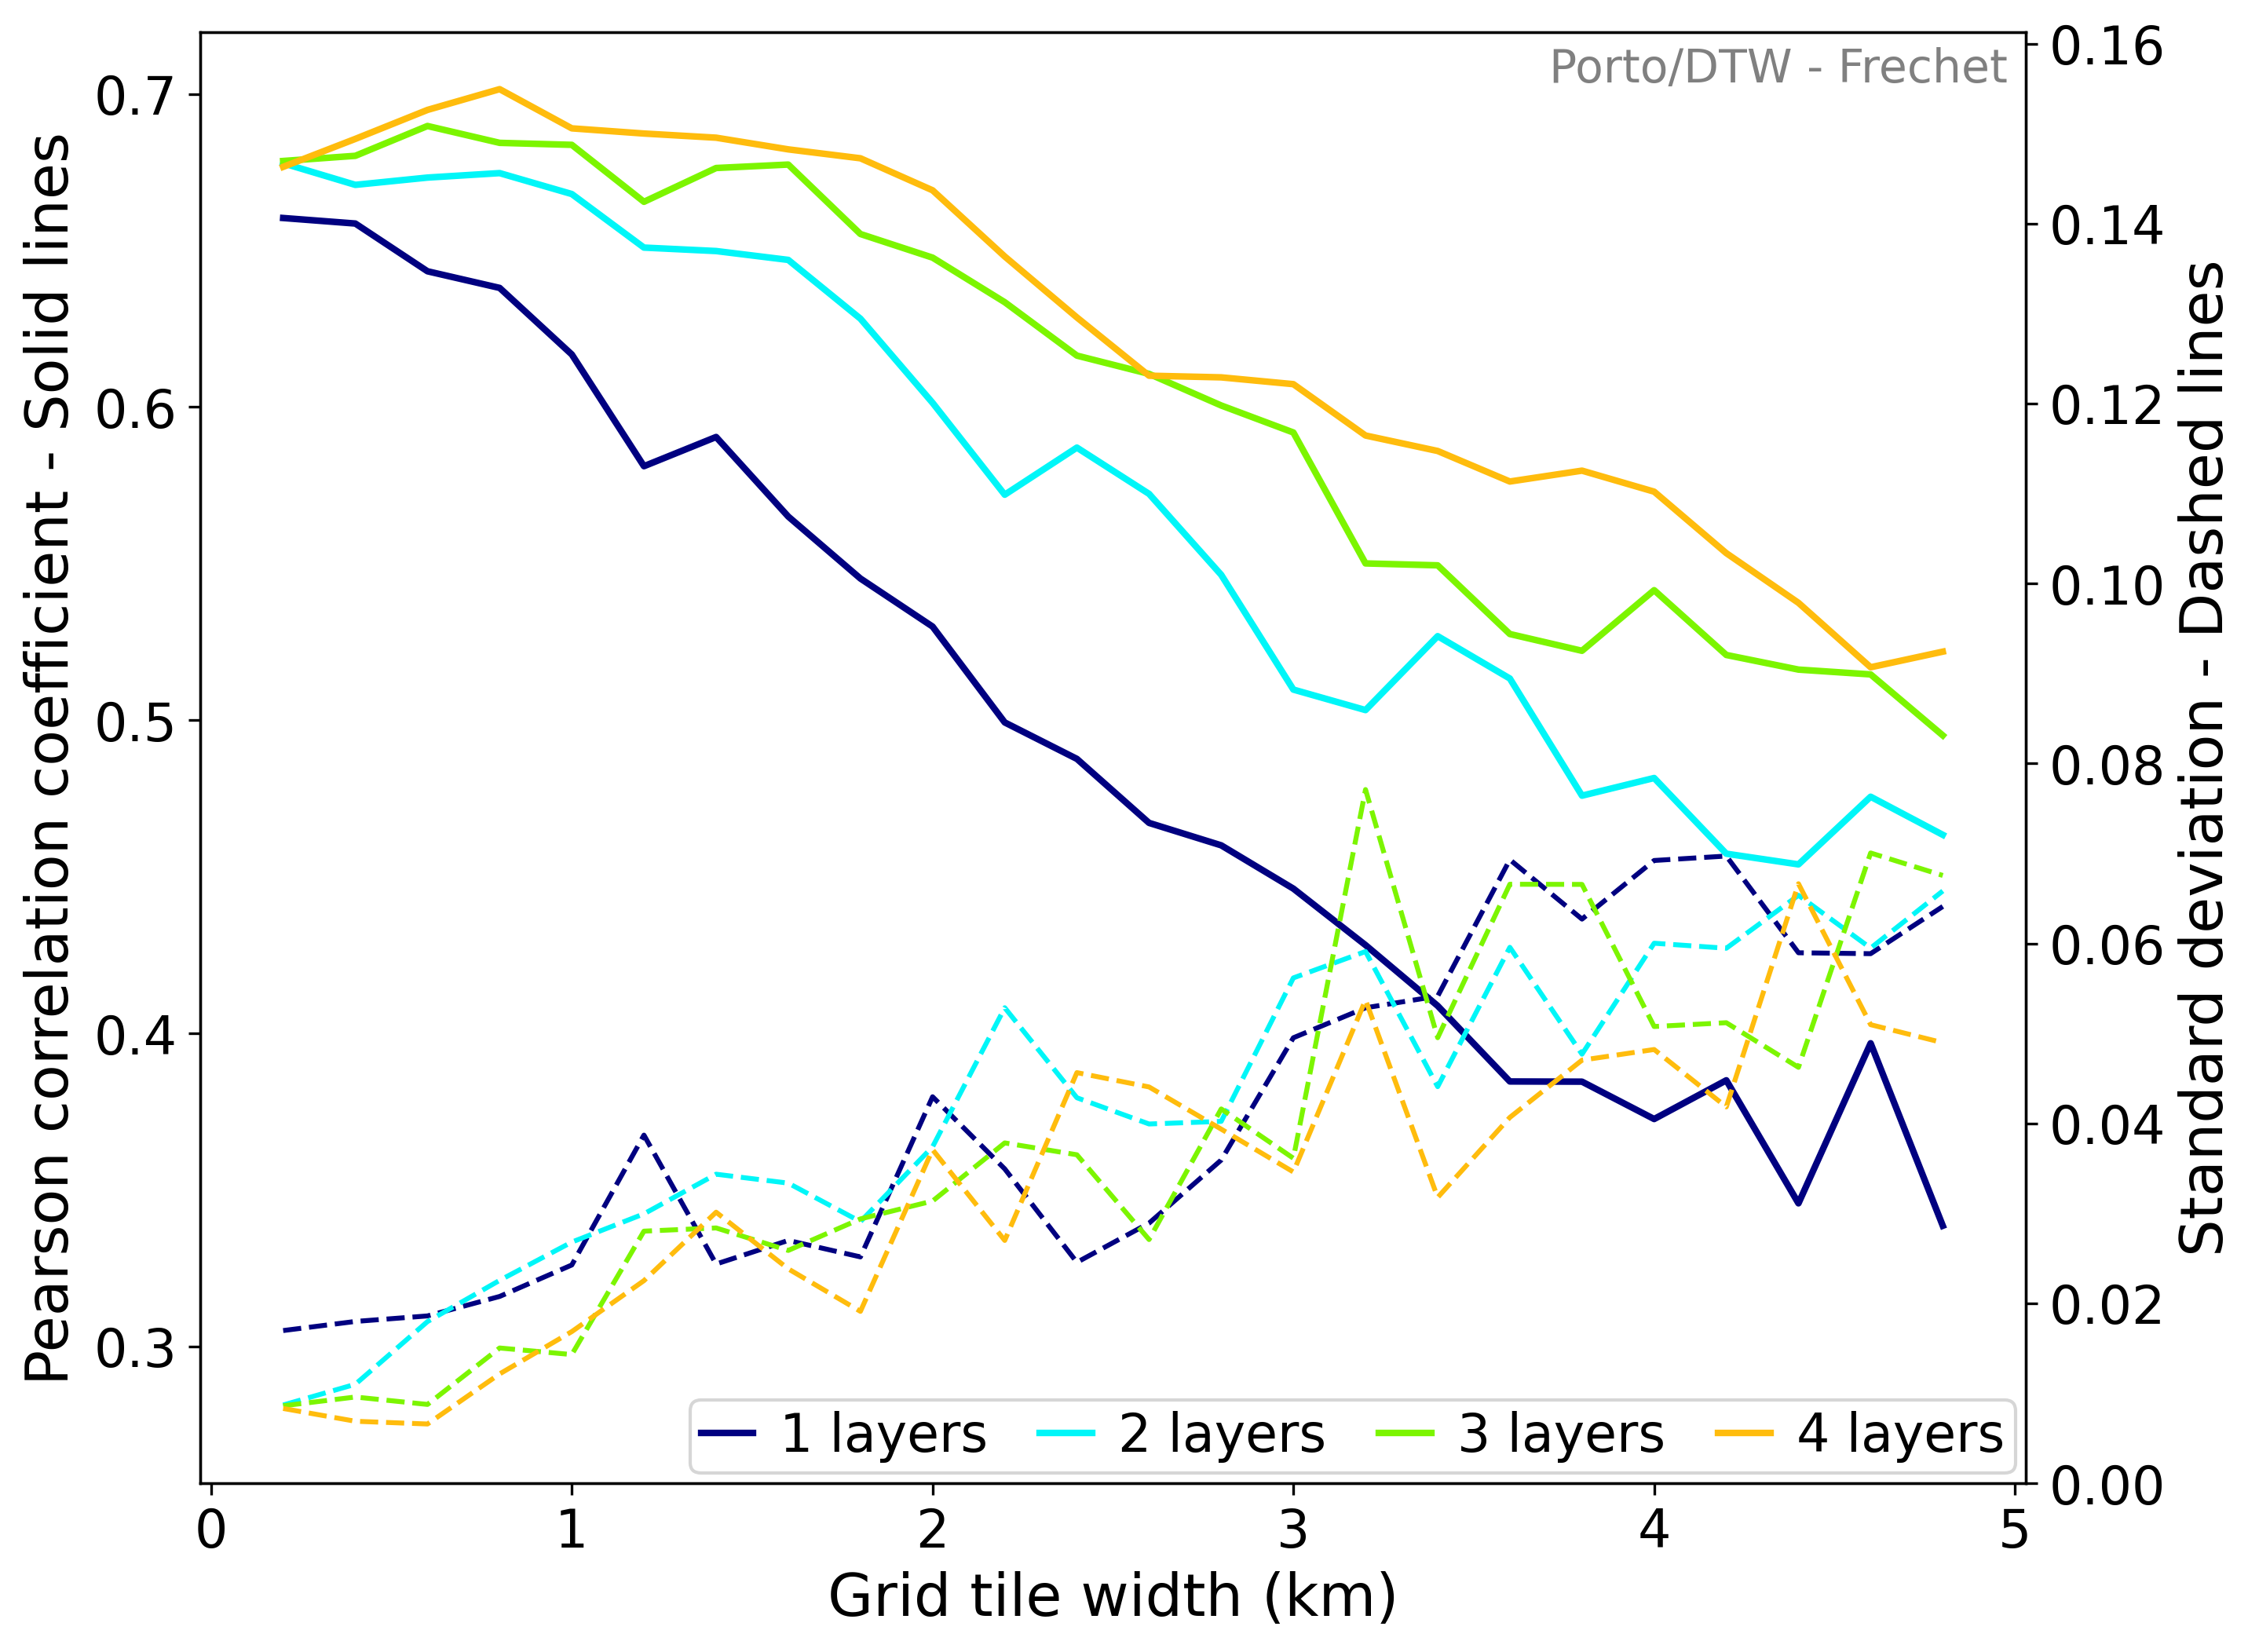

In [2]:
#Test-plot
plot_grid_res_layers("porto", [1,2,3,4], [0.2, 5, 0.2], parallell_jobs=20, reference="frechet")


## Grid Porto

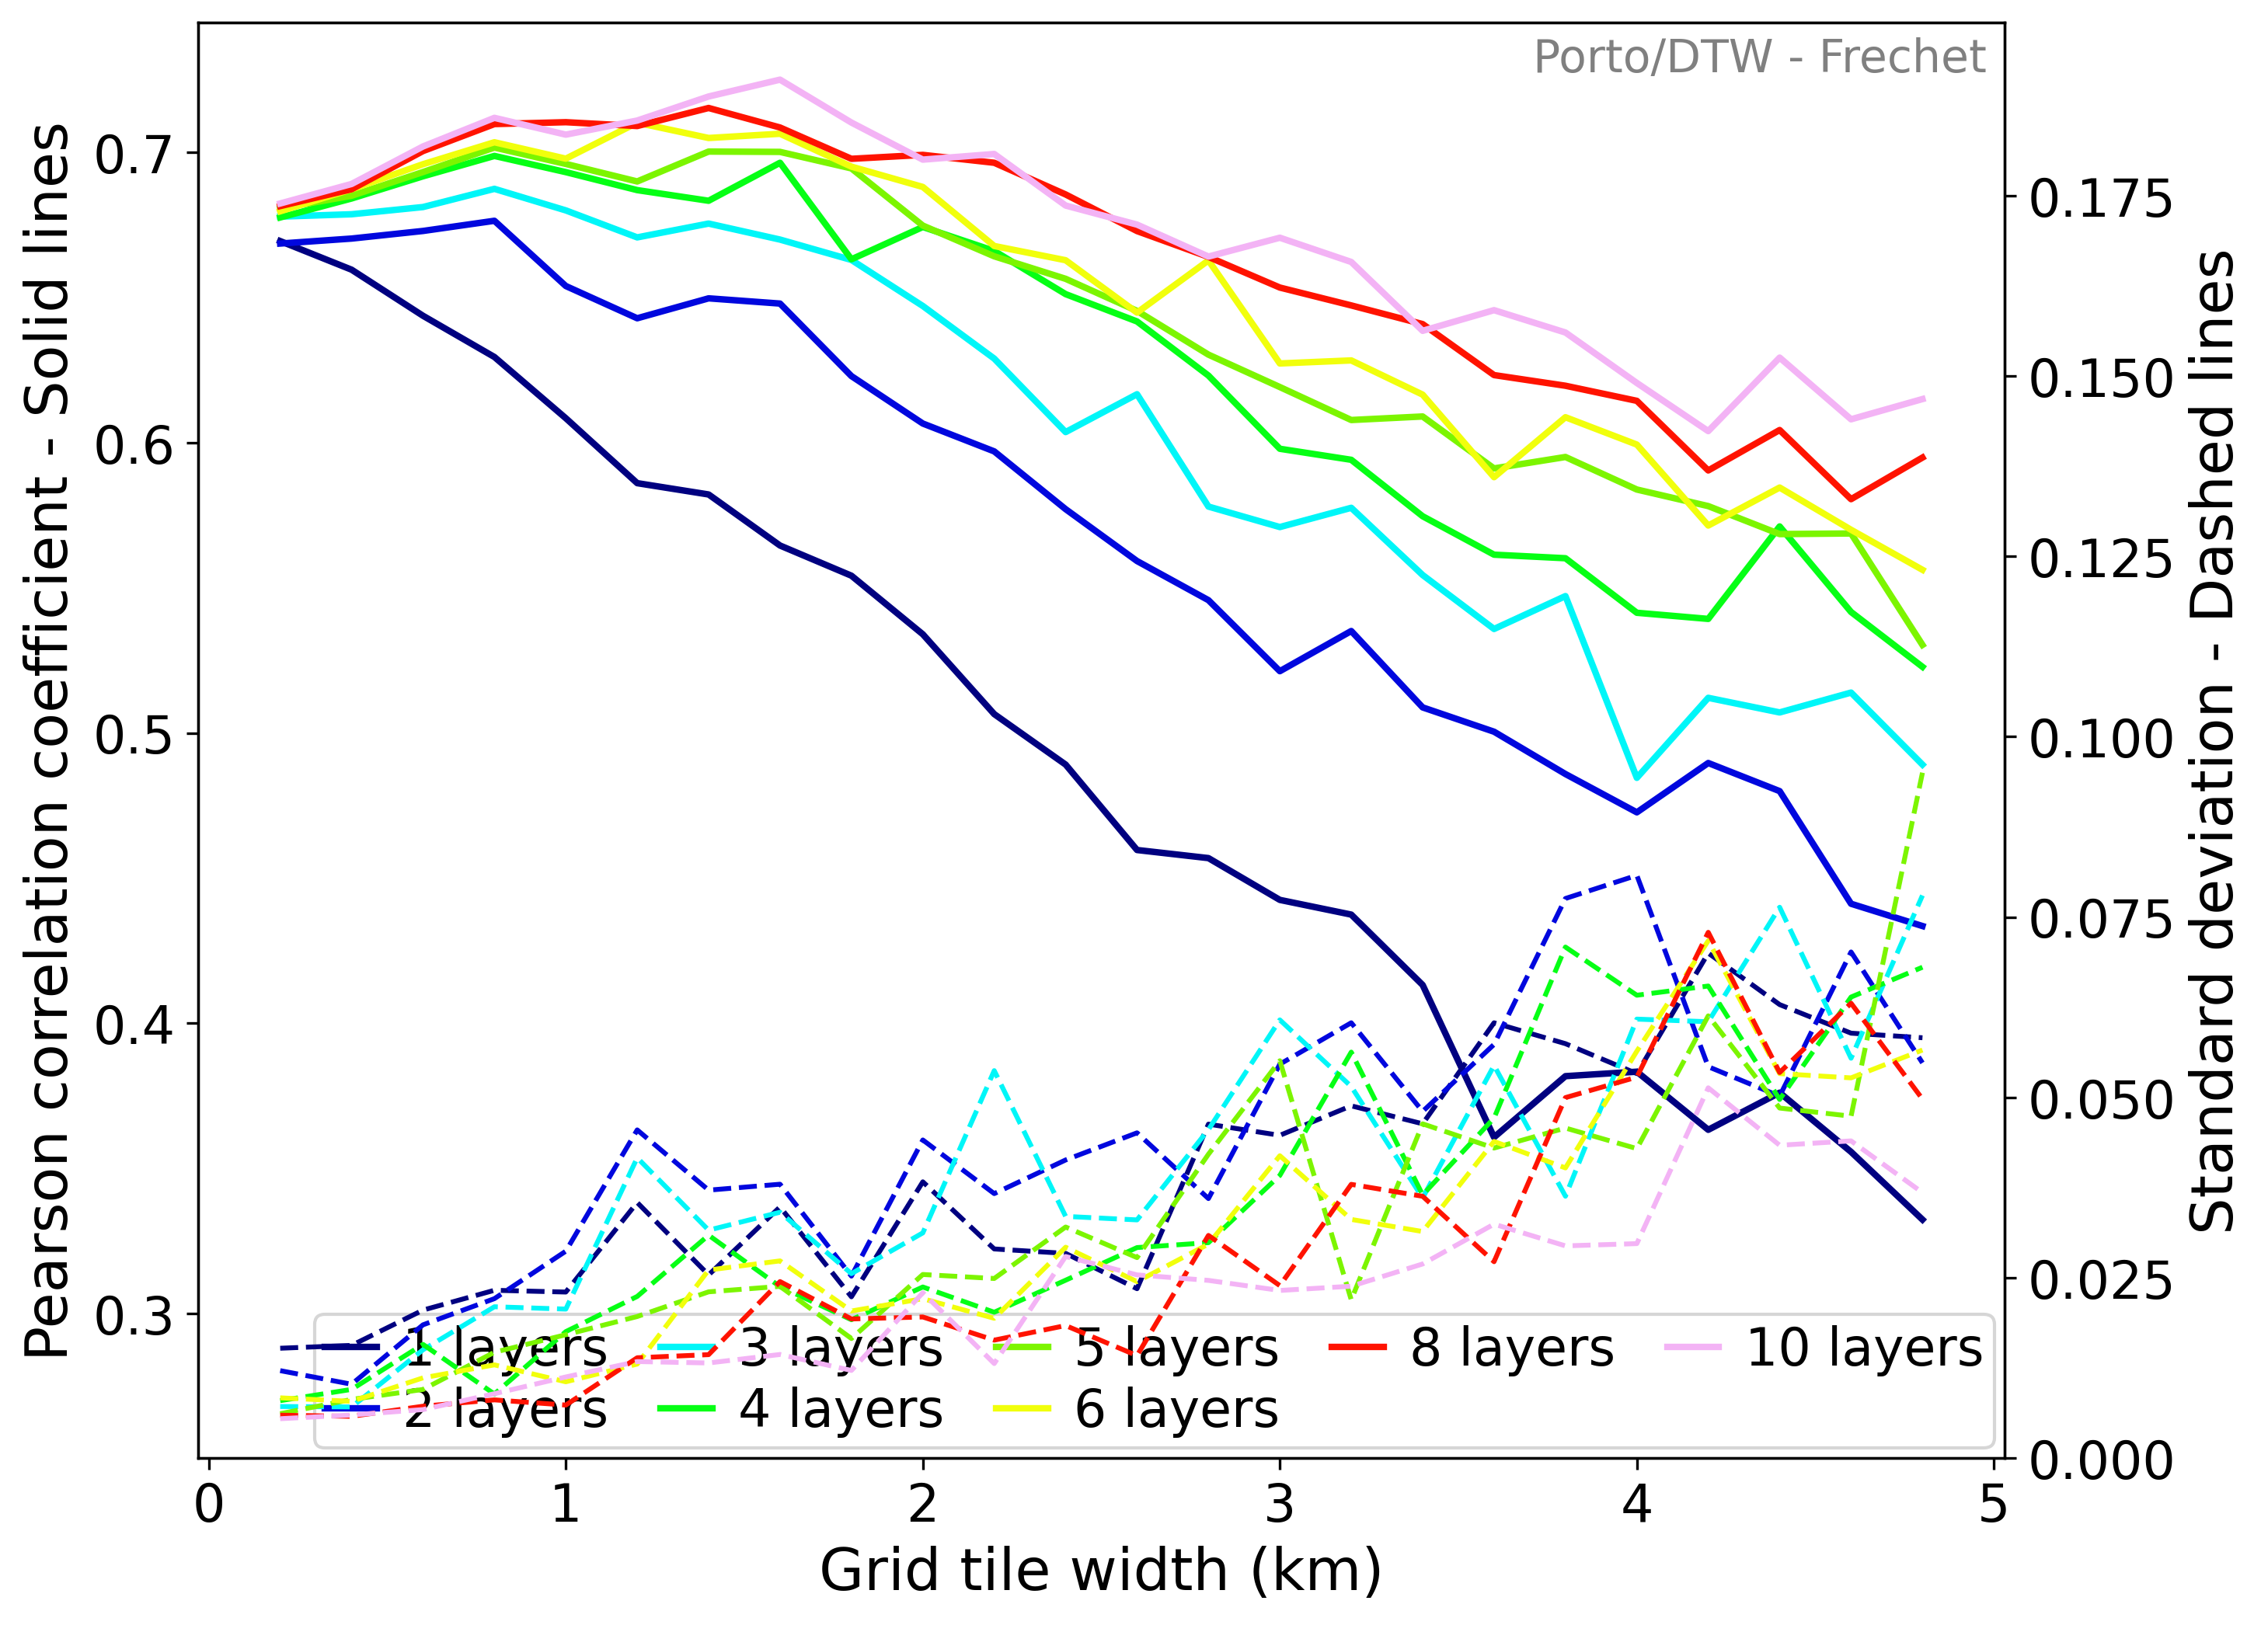

In [3]:
# Porto/DTW - Frechet
plot_grid_res_layers("porto", [1,2,3,4,5,6,8,10], [0.2, 5, 0.2], parallell_jobs=20, reference="frechet")

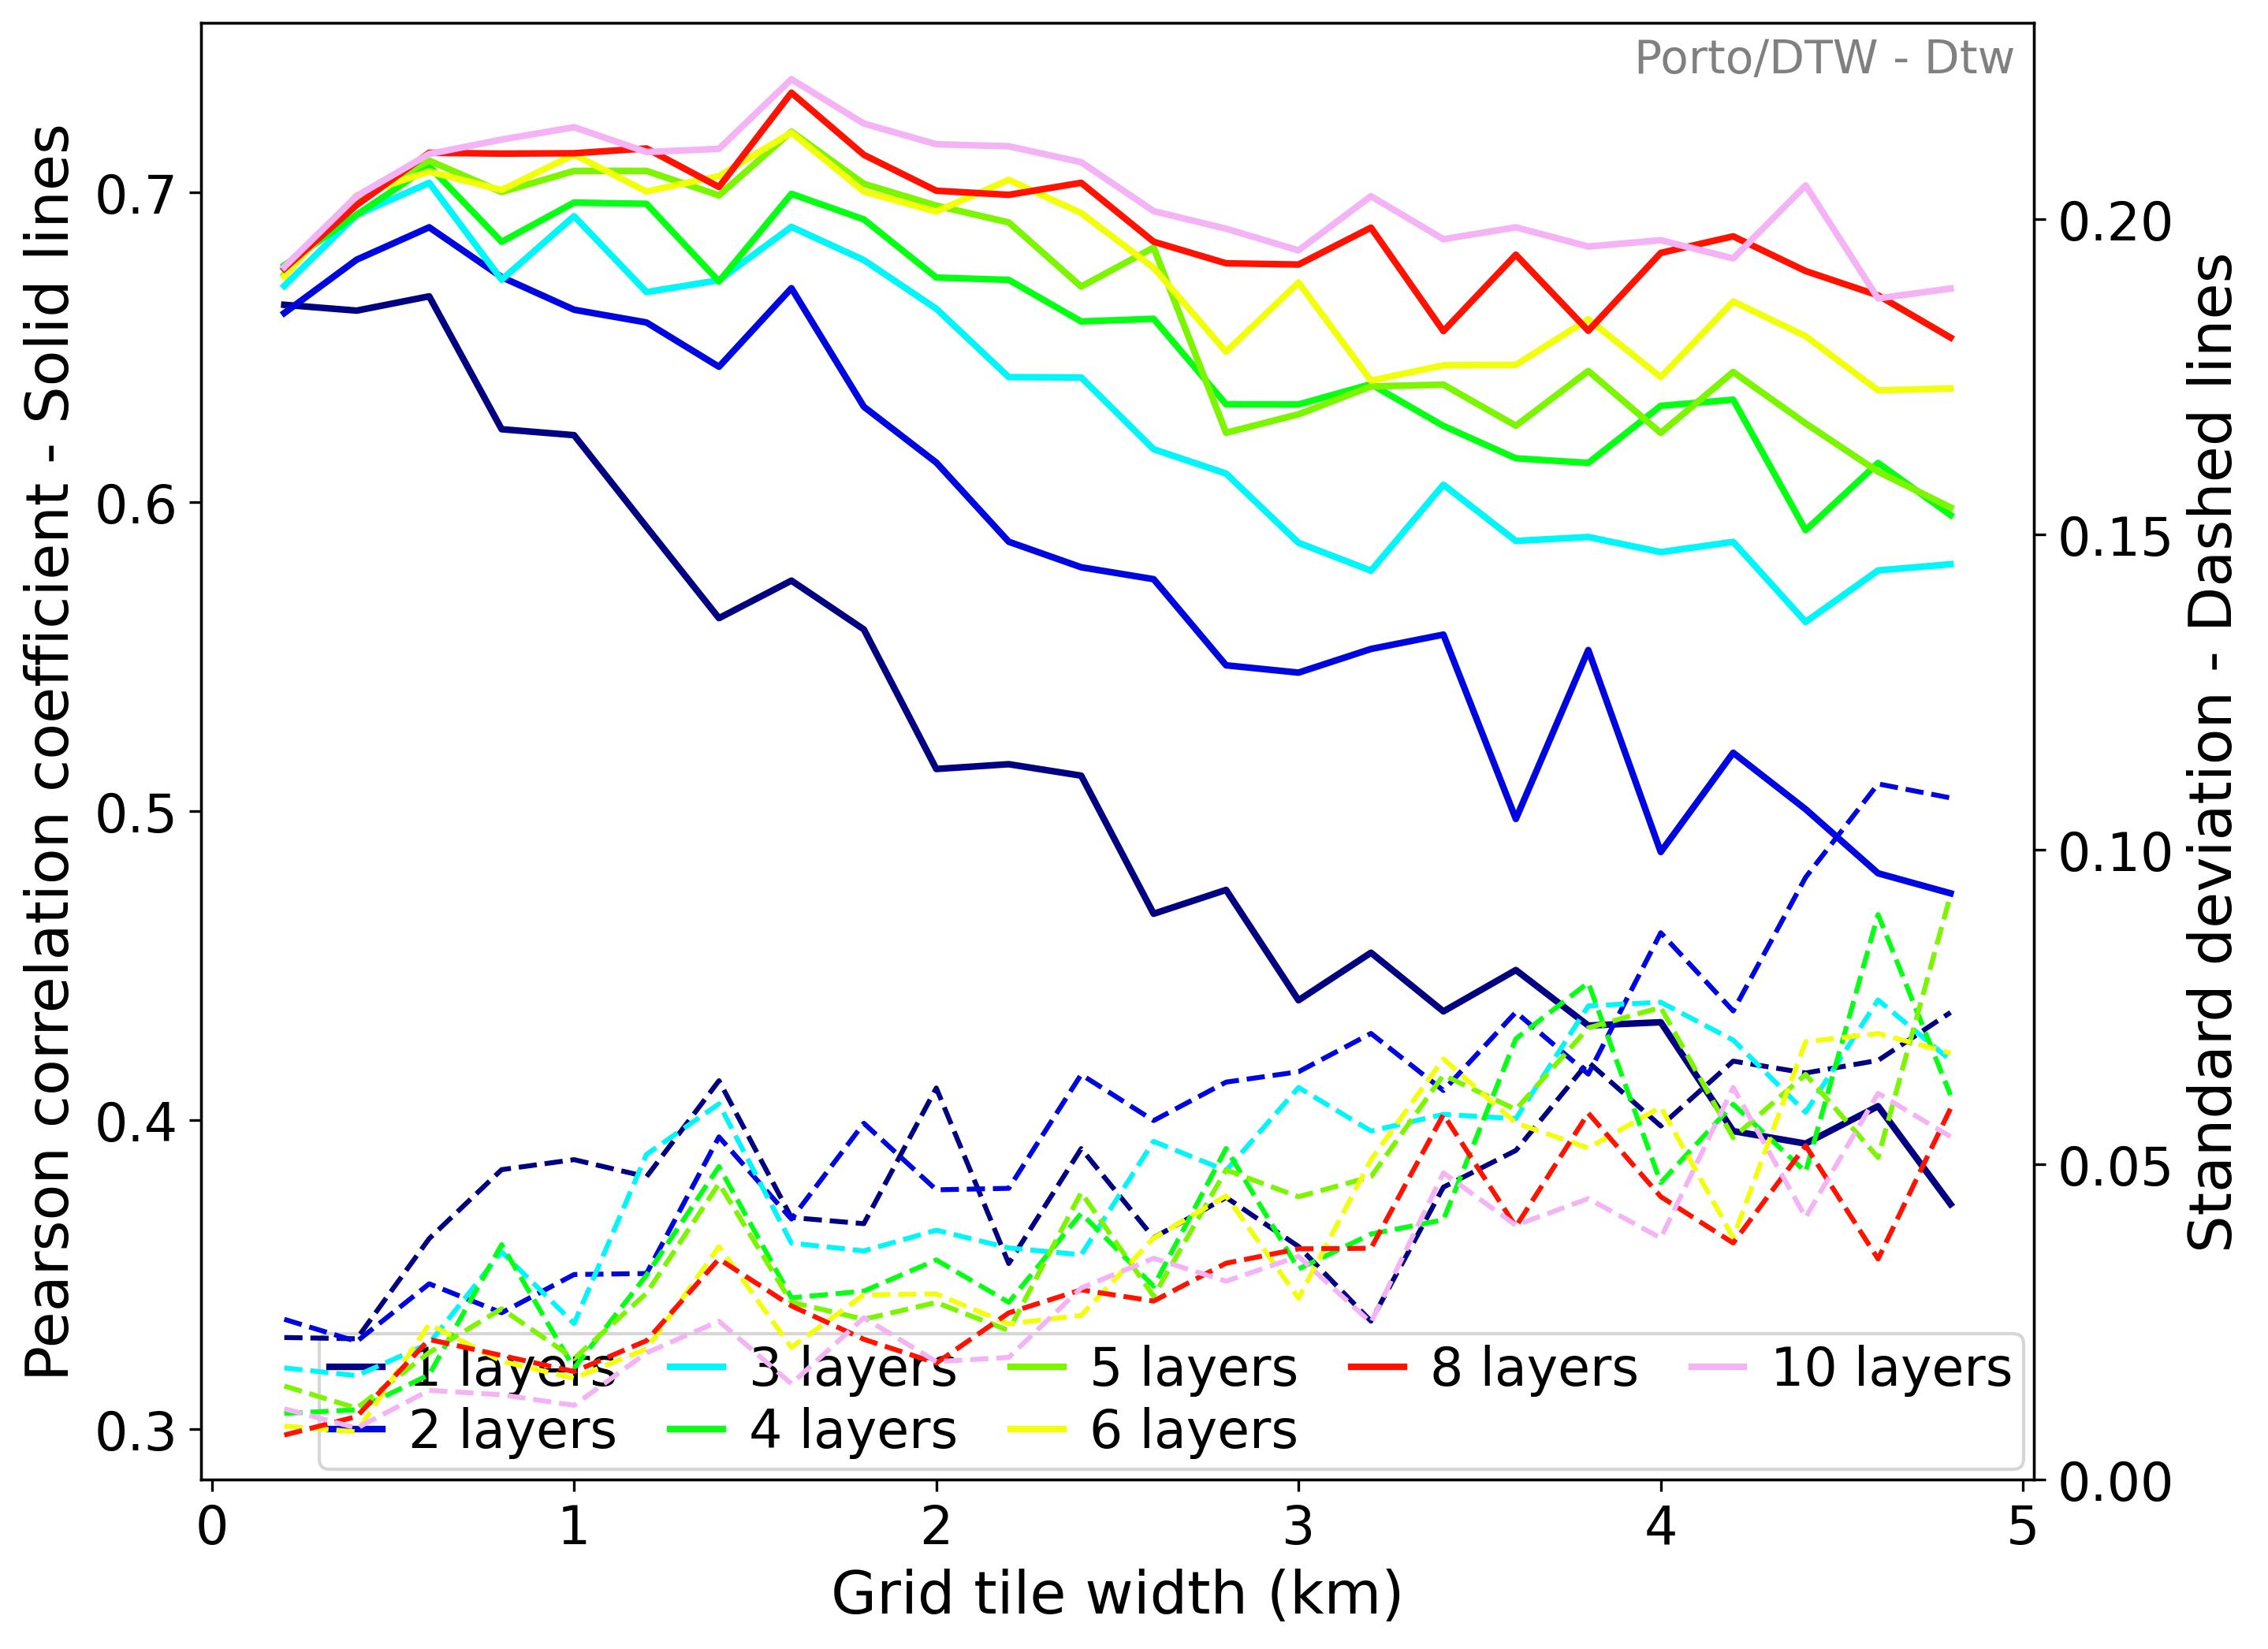

In [4]:
# Porto/DTW - DTW
plot_grid_res_layers("porto", [1,2,3,4,5,6,8,10], [0.2, 5, 0.2], parallell_jobs=20, reference="dtw")

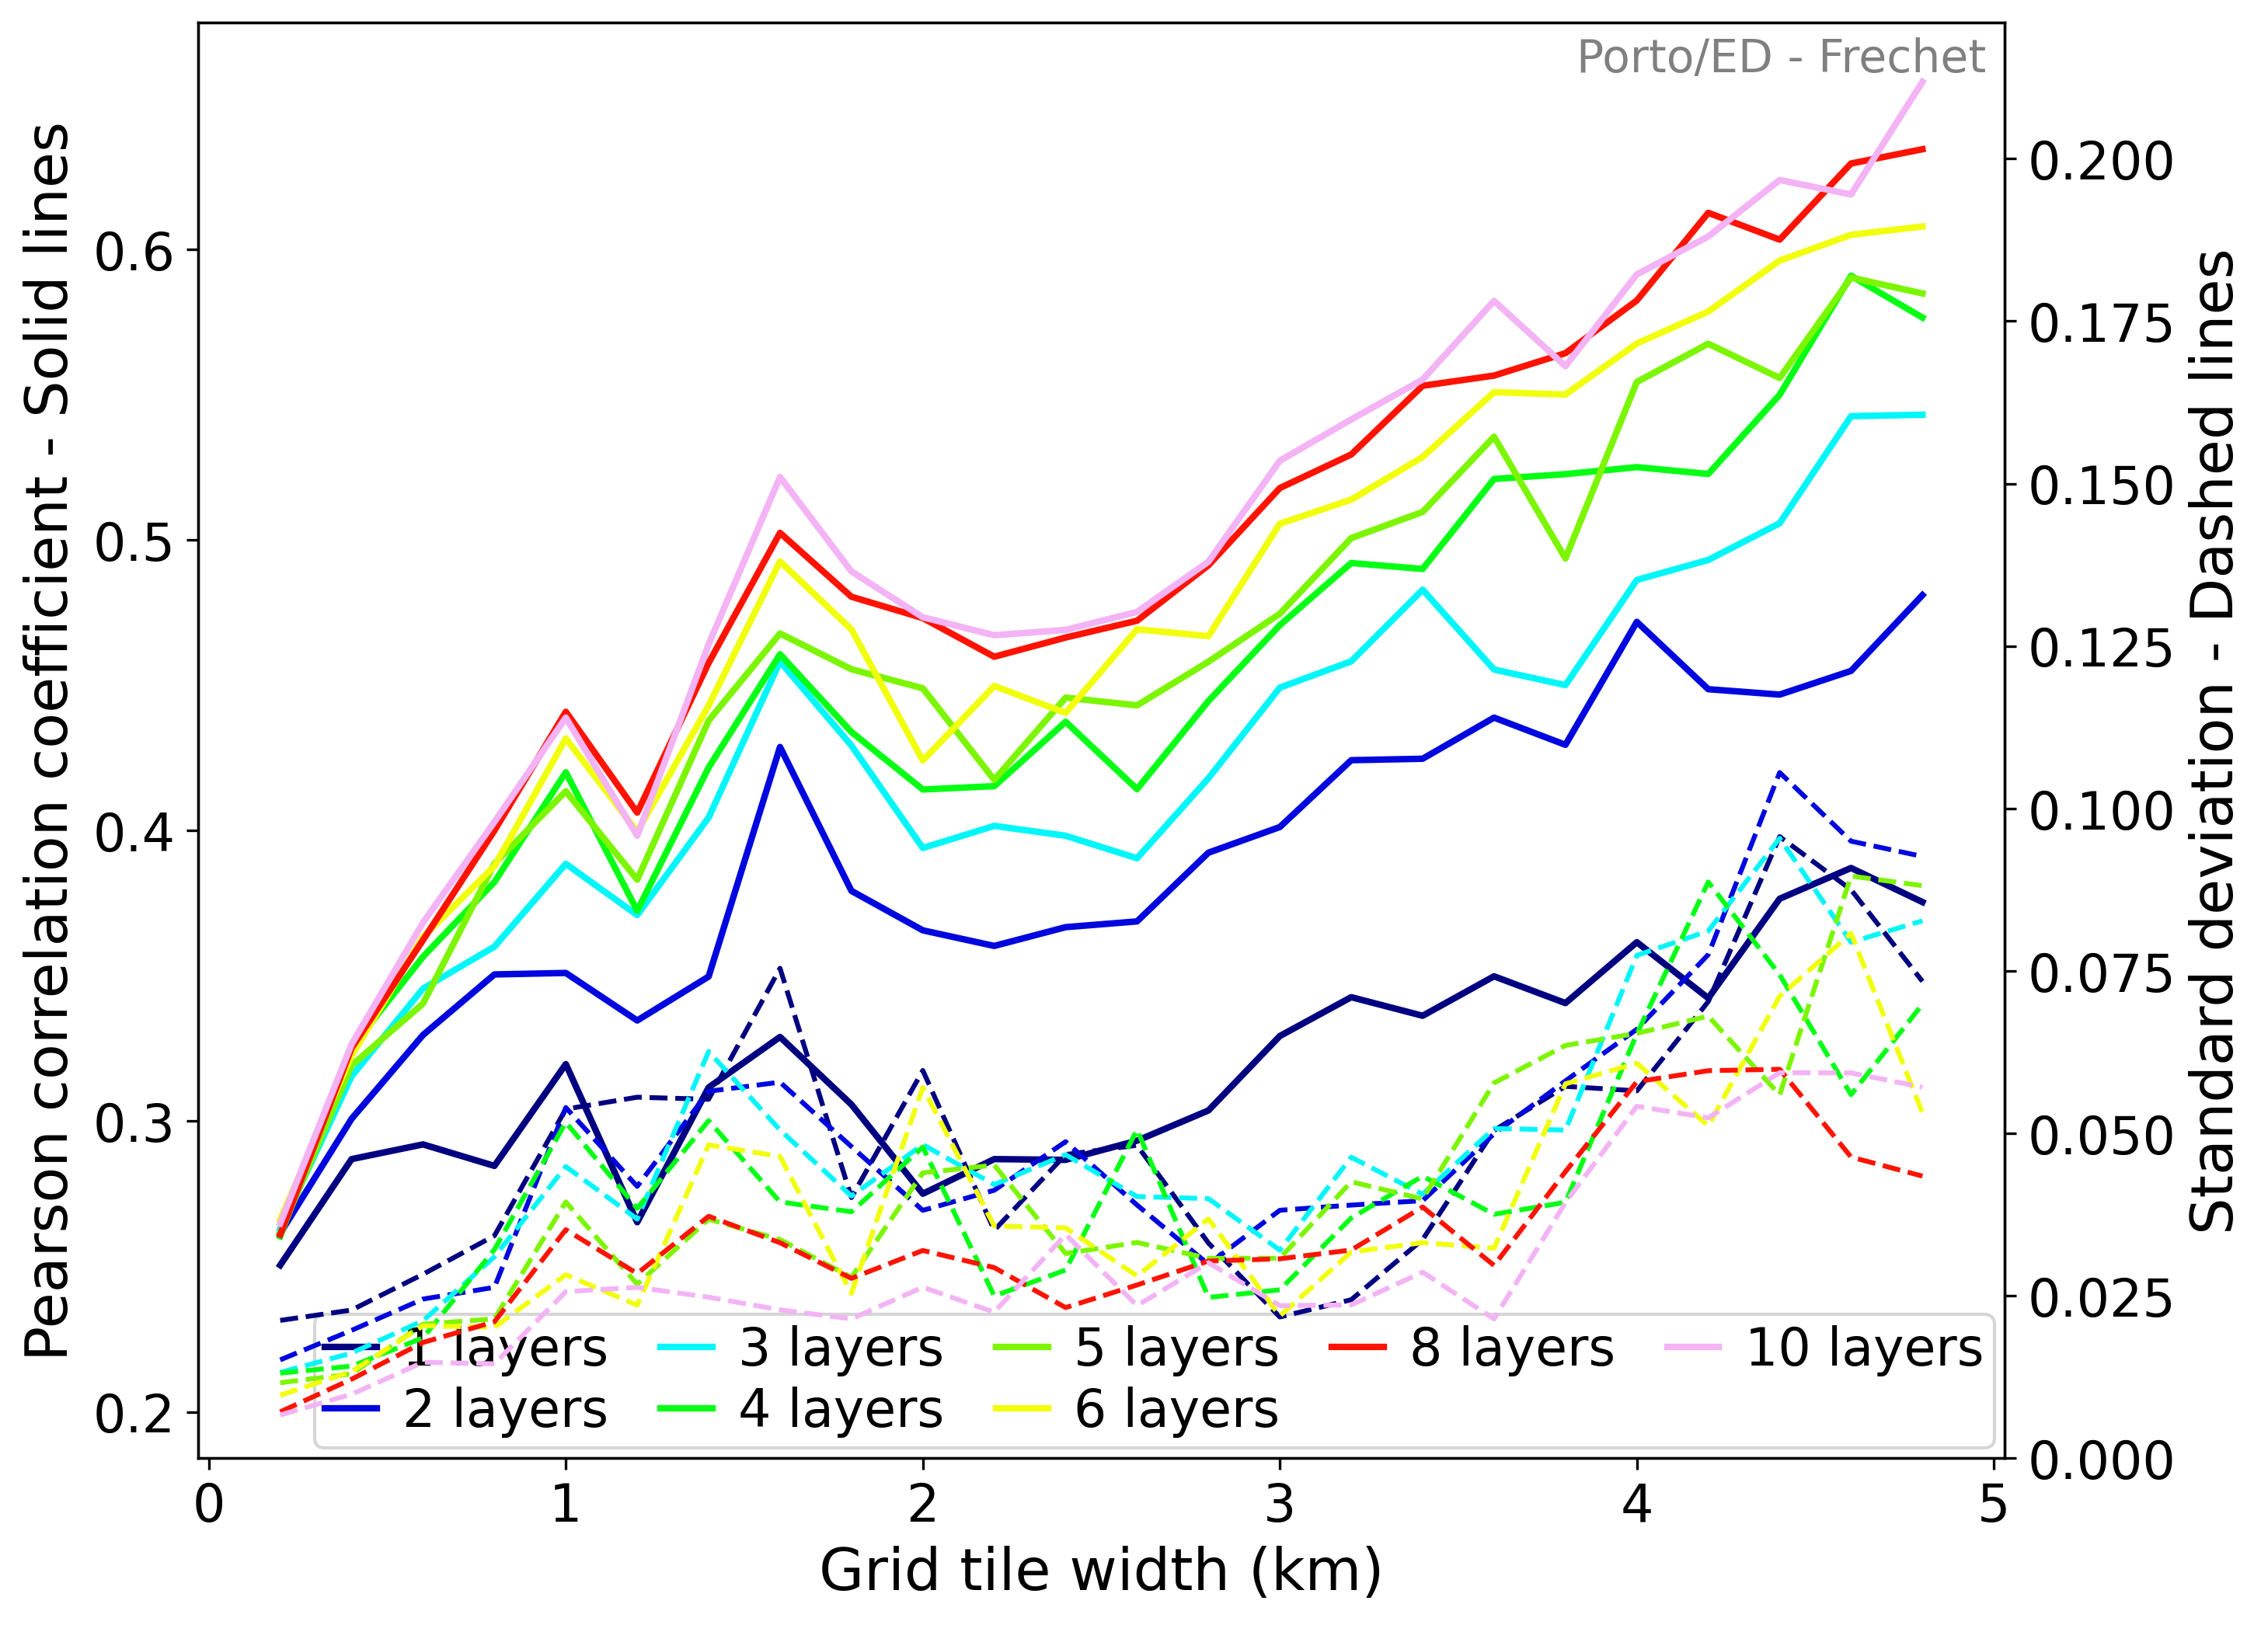

In [5]:
# Porto/ED - Frechet
plot_grid_res_layers("porto", [1,2,3,4,5,6,8,10], [0.2, 5, 0.2], measure="py_ed", parallell_jobs=20, reference="frechet")

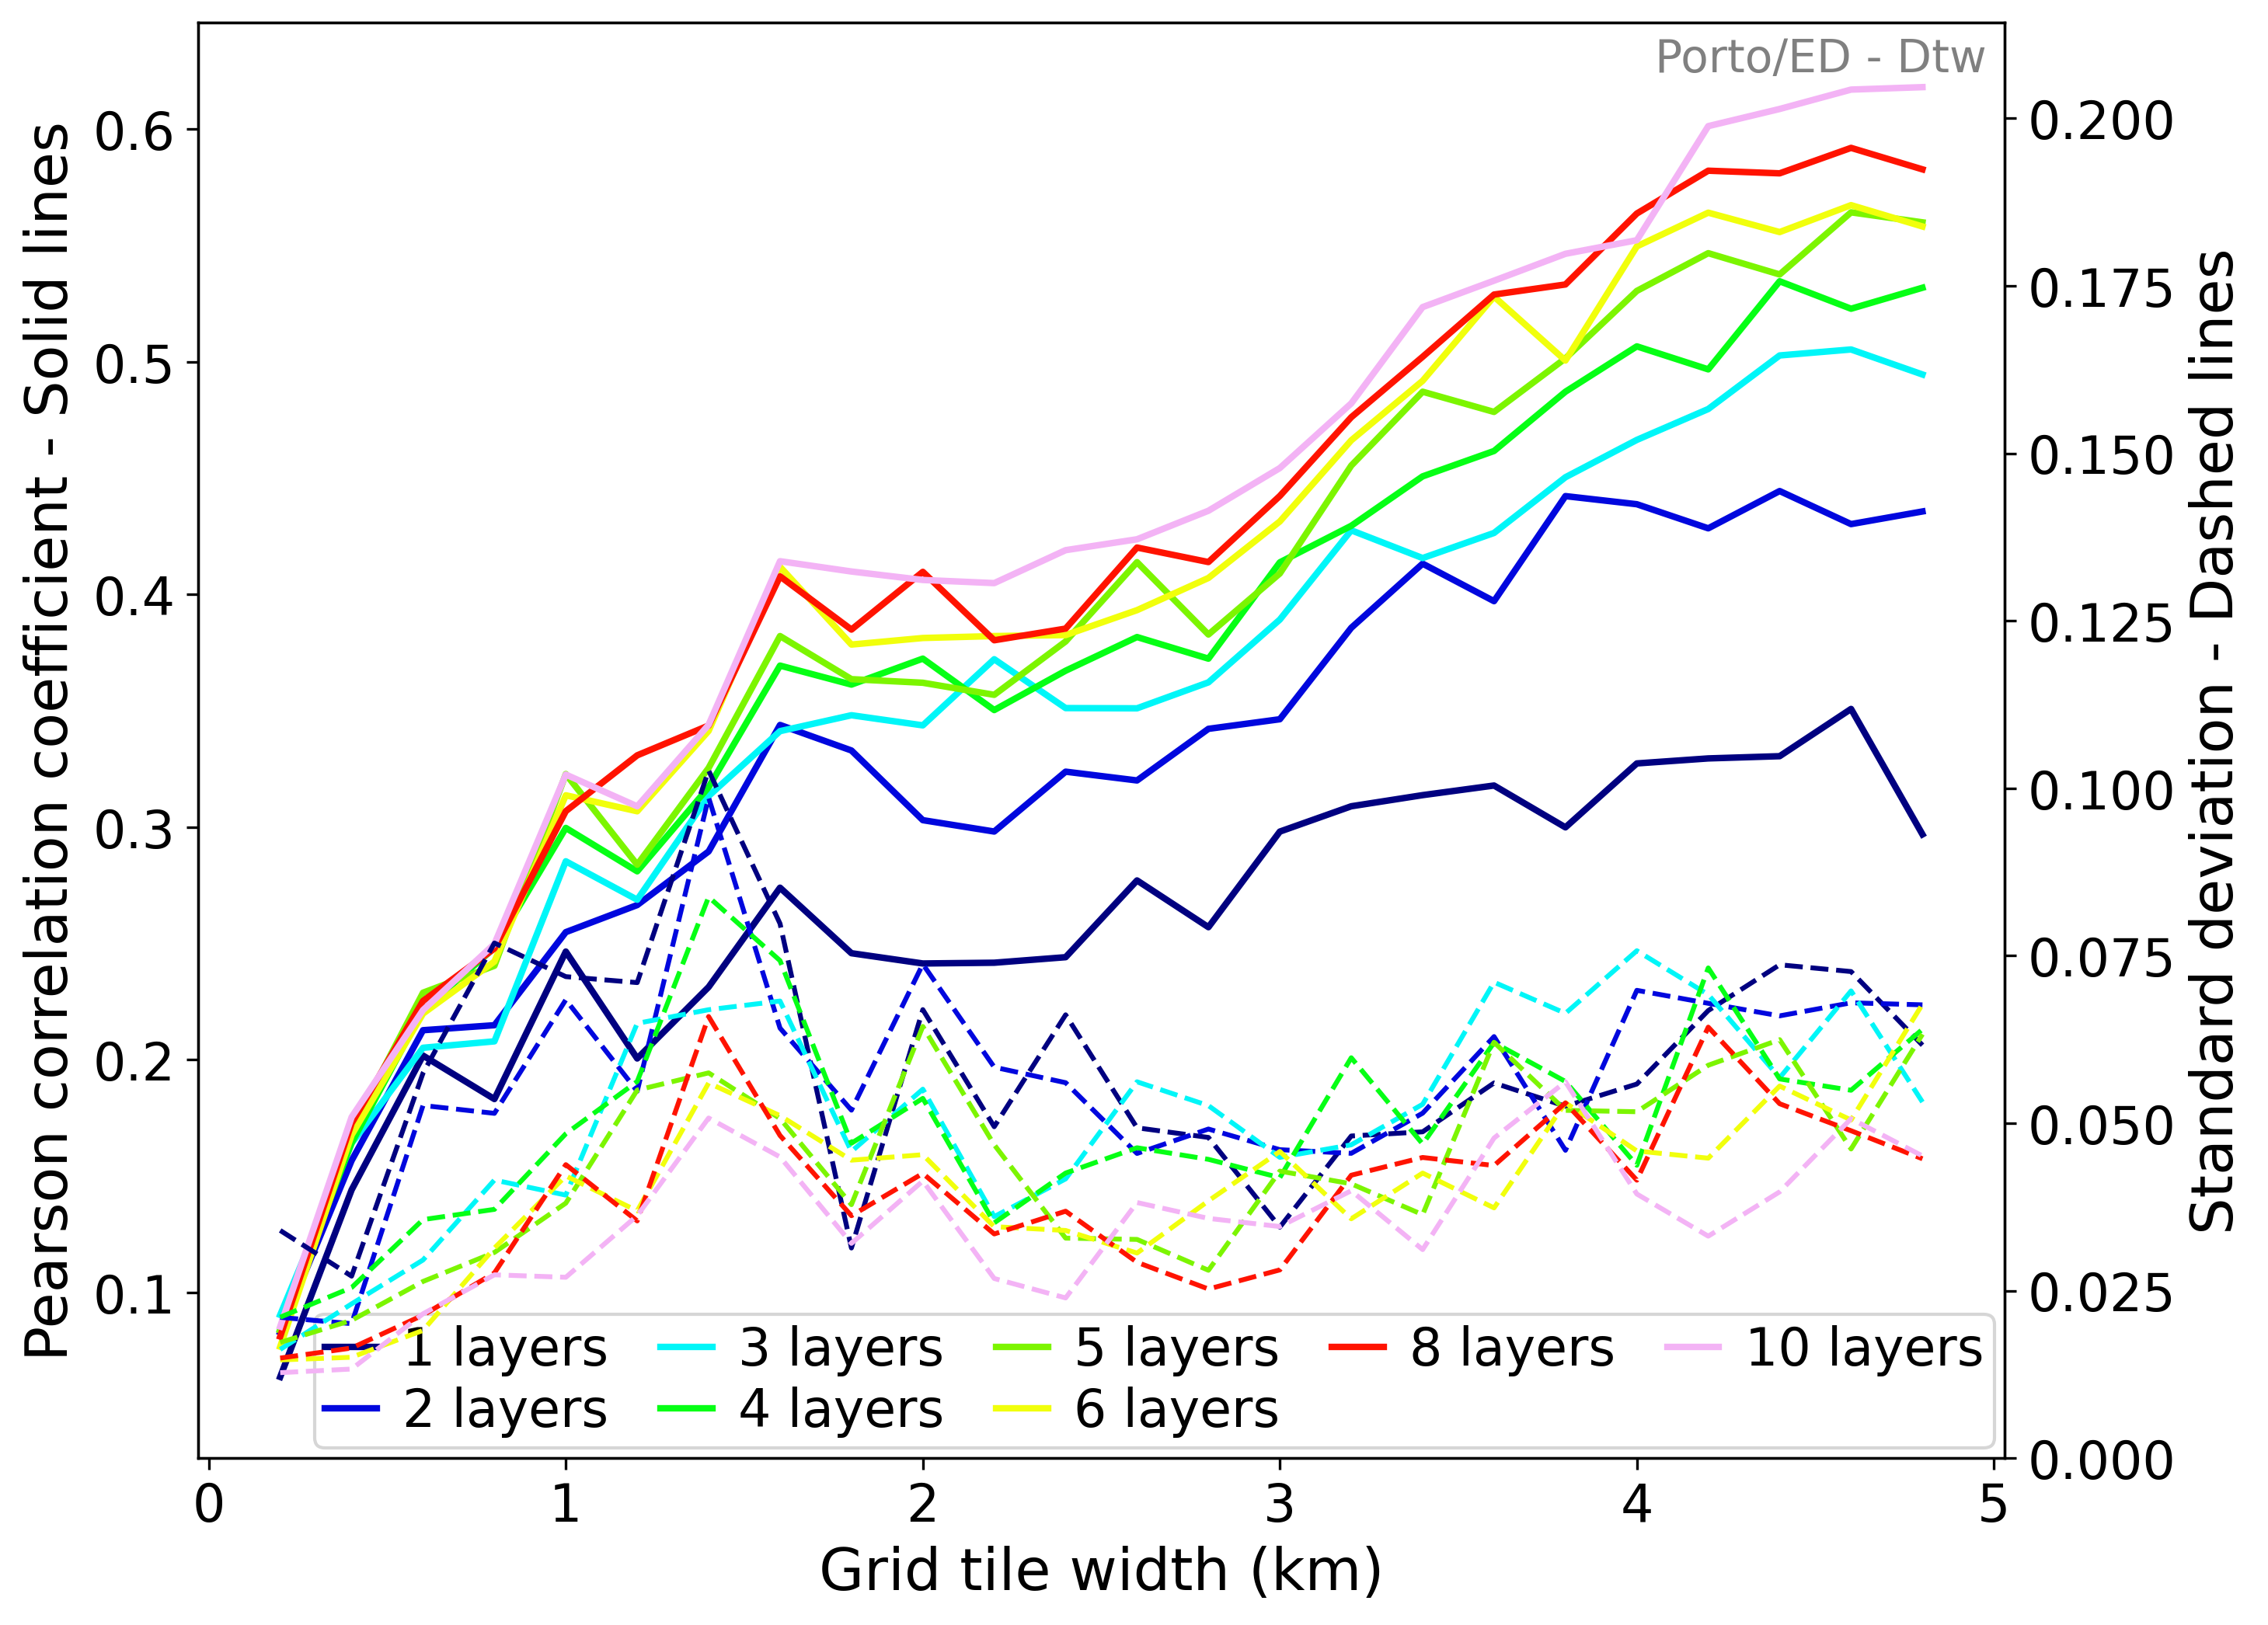

In [6]:
# Porto/ED - DTW
plot_grid_res_layers("porto", [1,2,3,4,5,6,8,10], [0.2, 5, 0.2], measure="py_ed", parallell_jobs=20, reference="dtw")

# Disk Porto

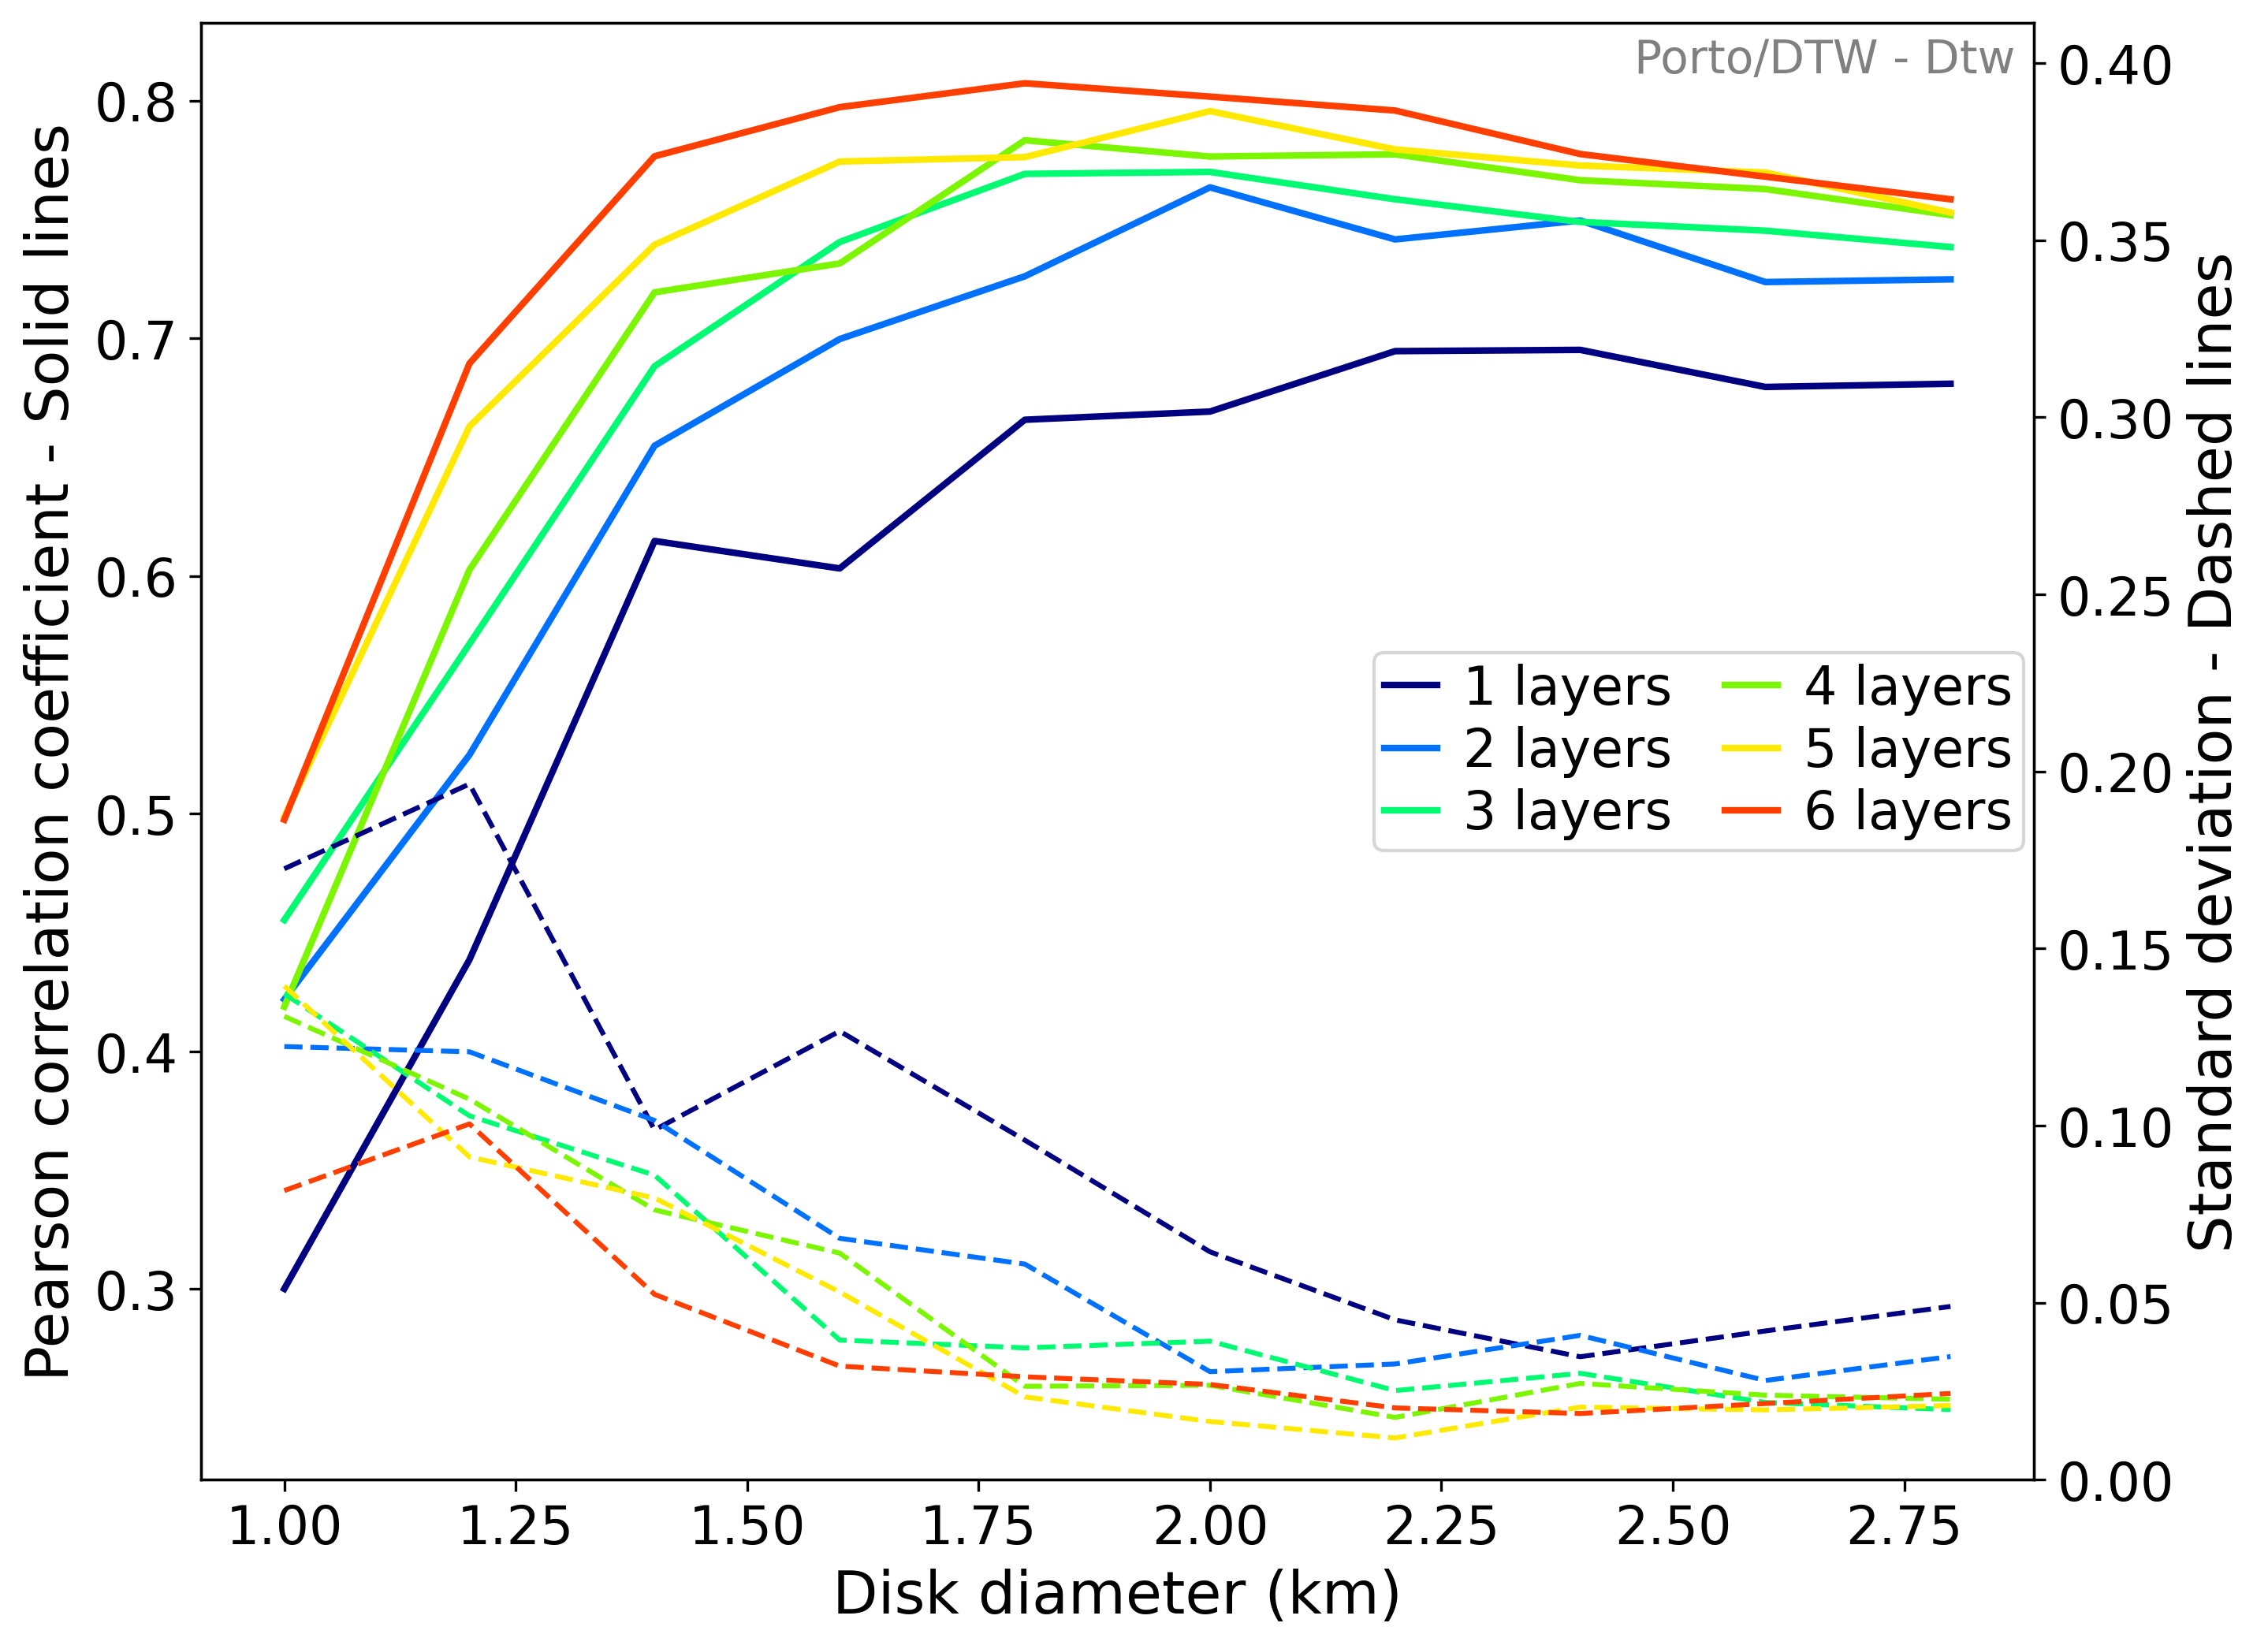

In [7]:
plot_disk_dia_layers("porto", [1,2,3,4,5,6], [1, 3, 0.2], measure="py_dtw", reference="dtw", parallell_jobs=20 )

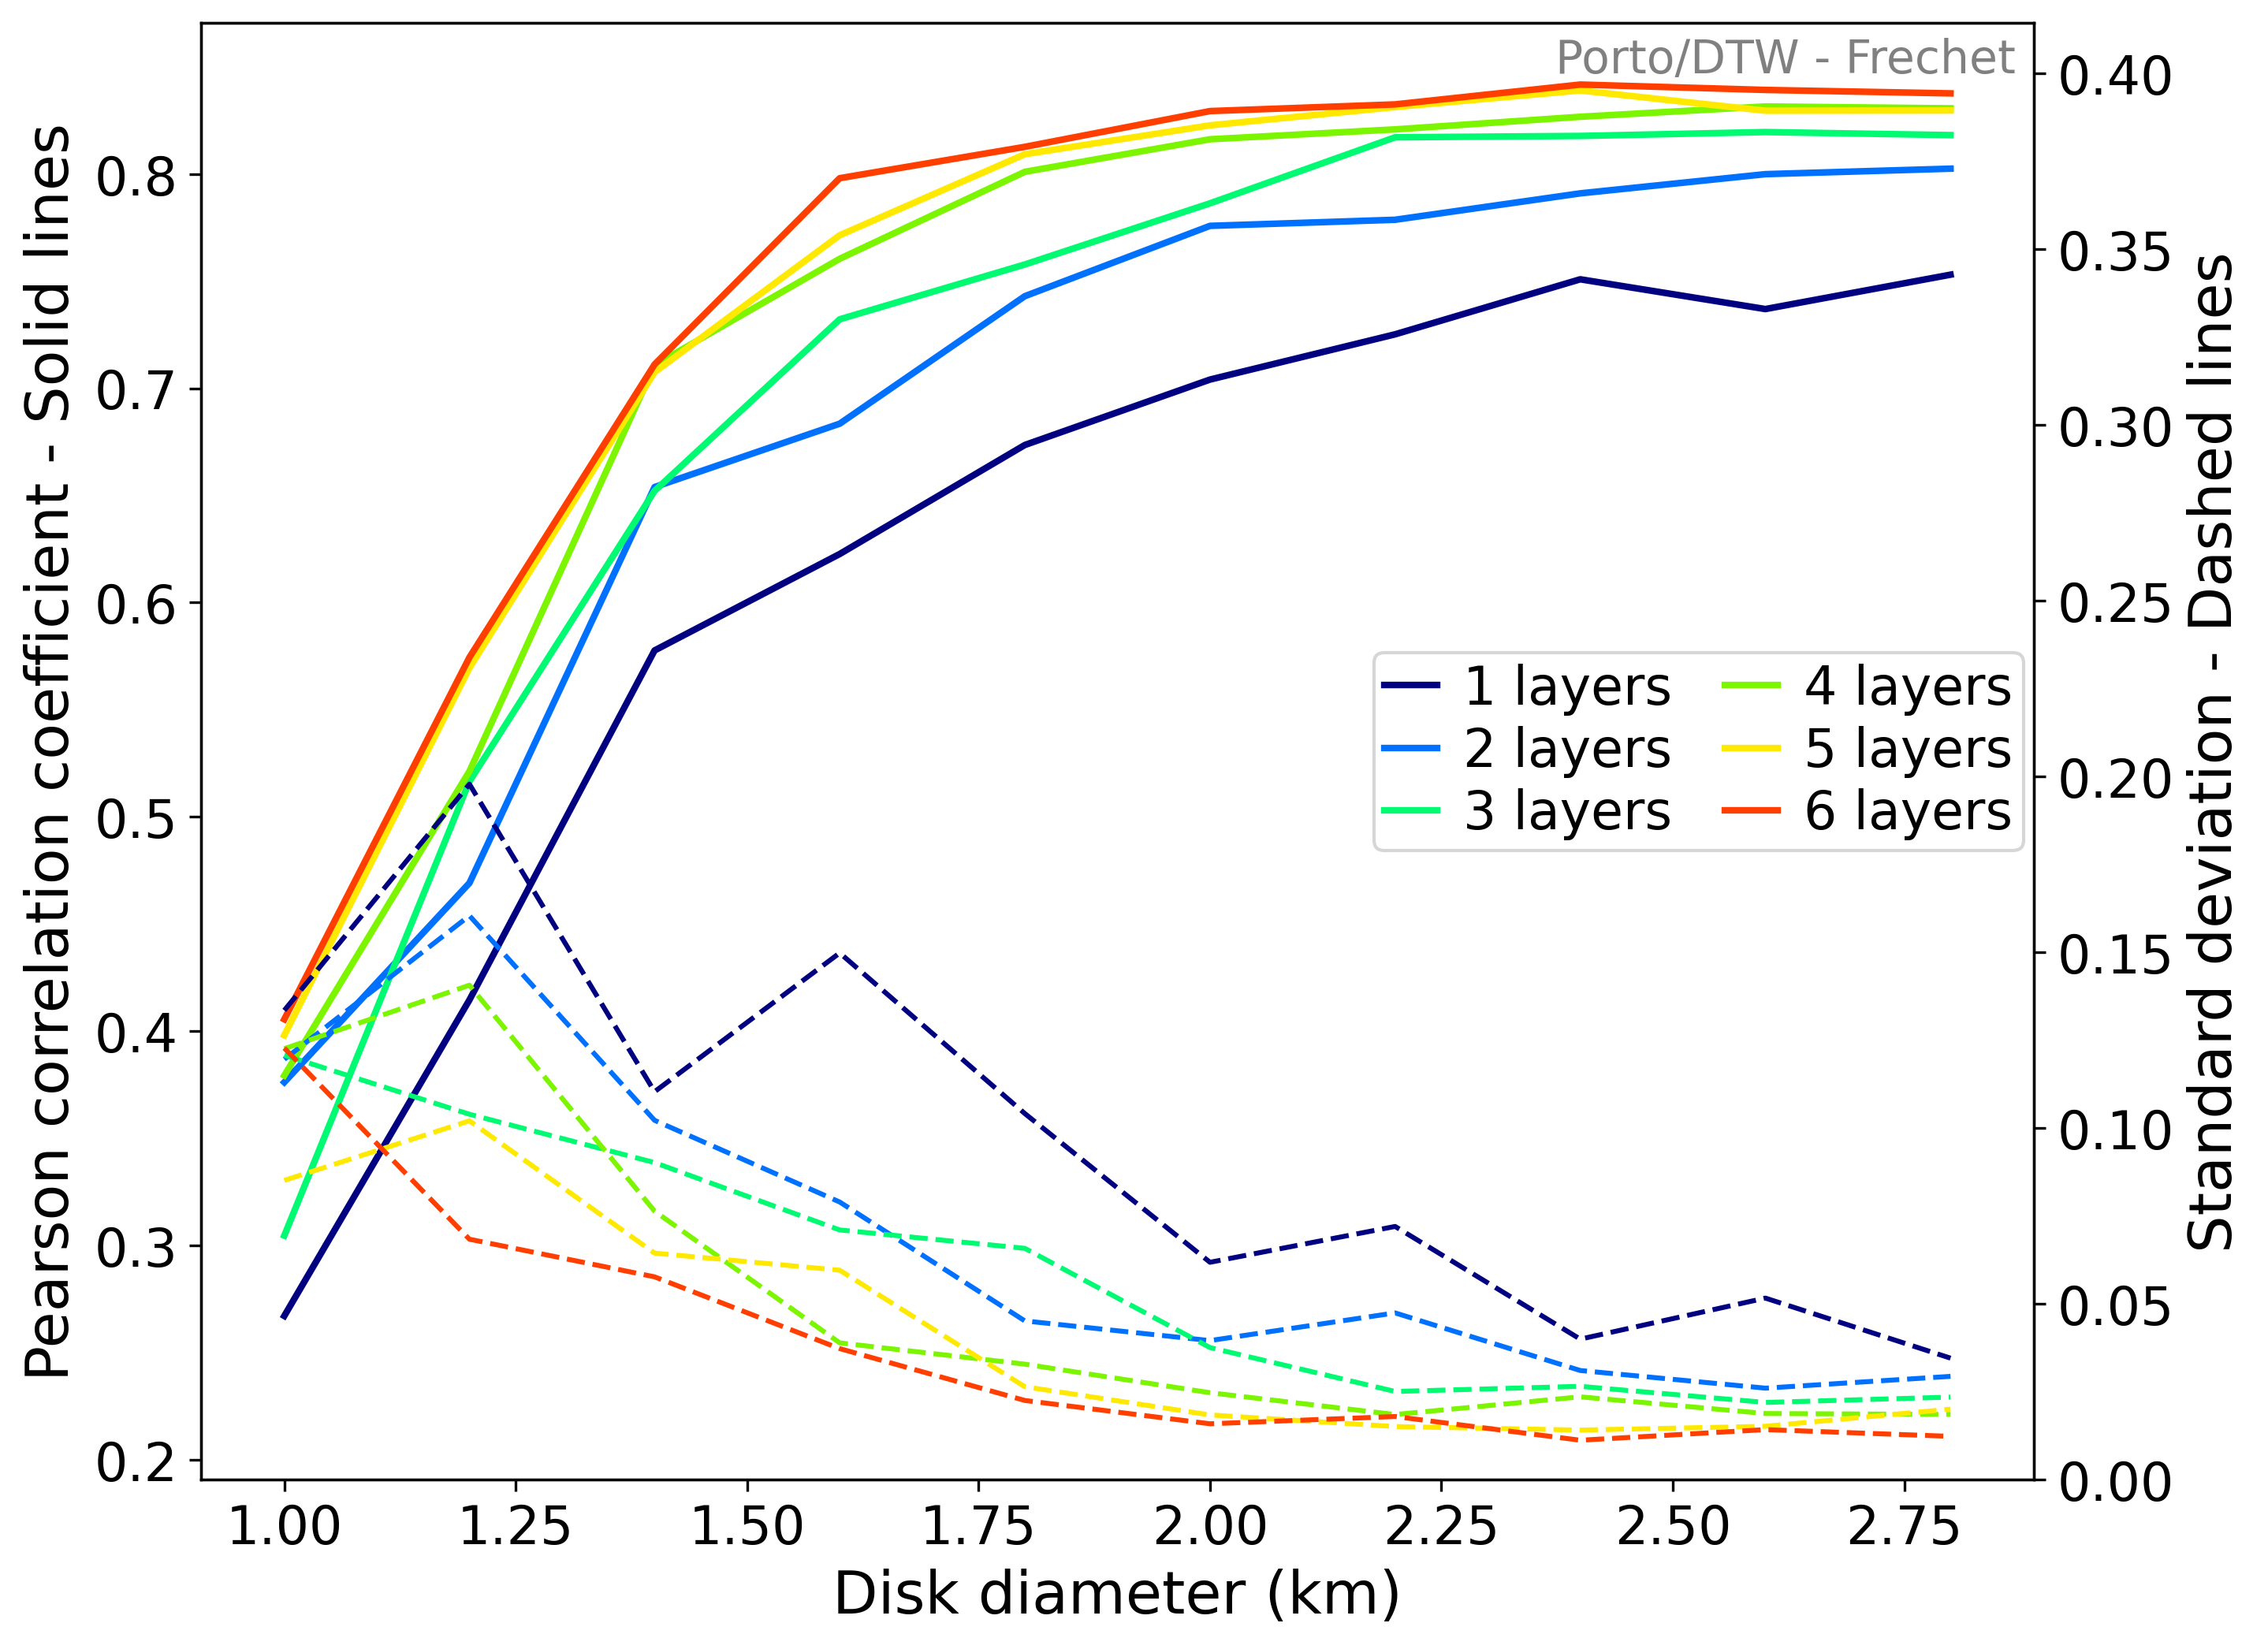

In [8]:
plot_disk_dia_layers("porto", [1,2,3,4,5,6], [1, 3, 0.2], measure="py_dtw", reference="frechet", parallell_jobs=20 )

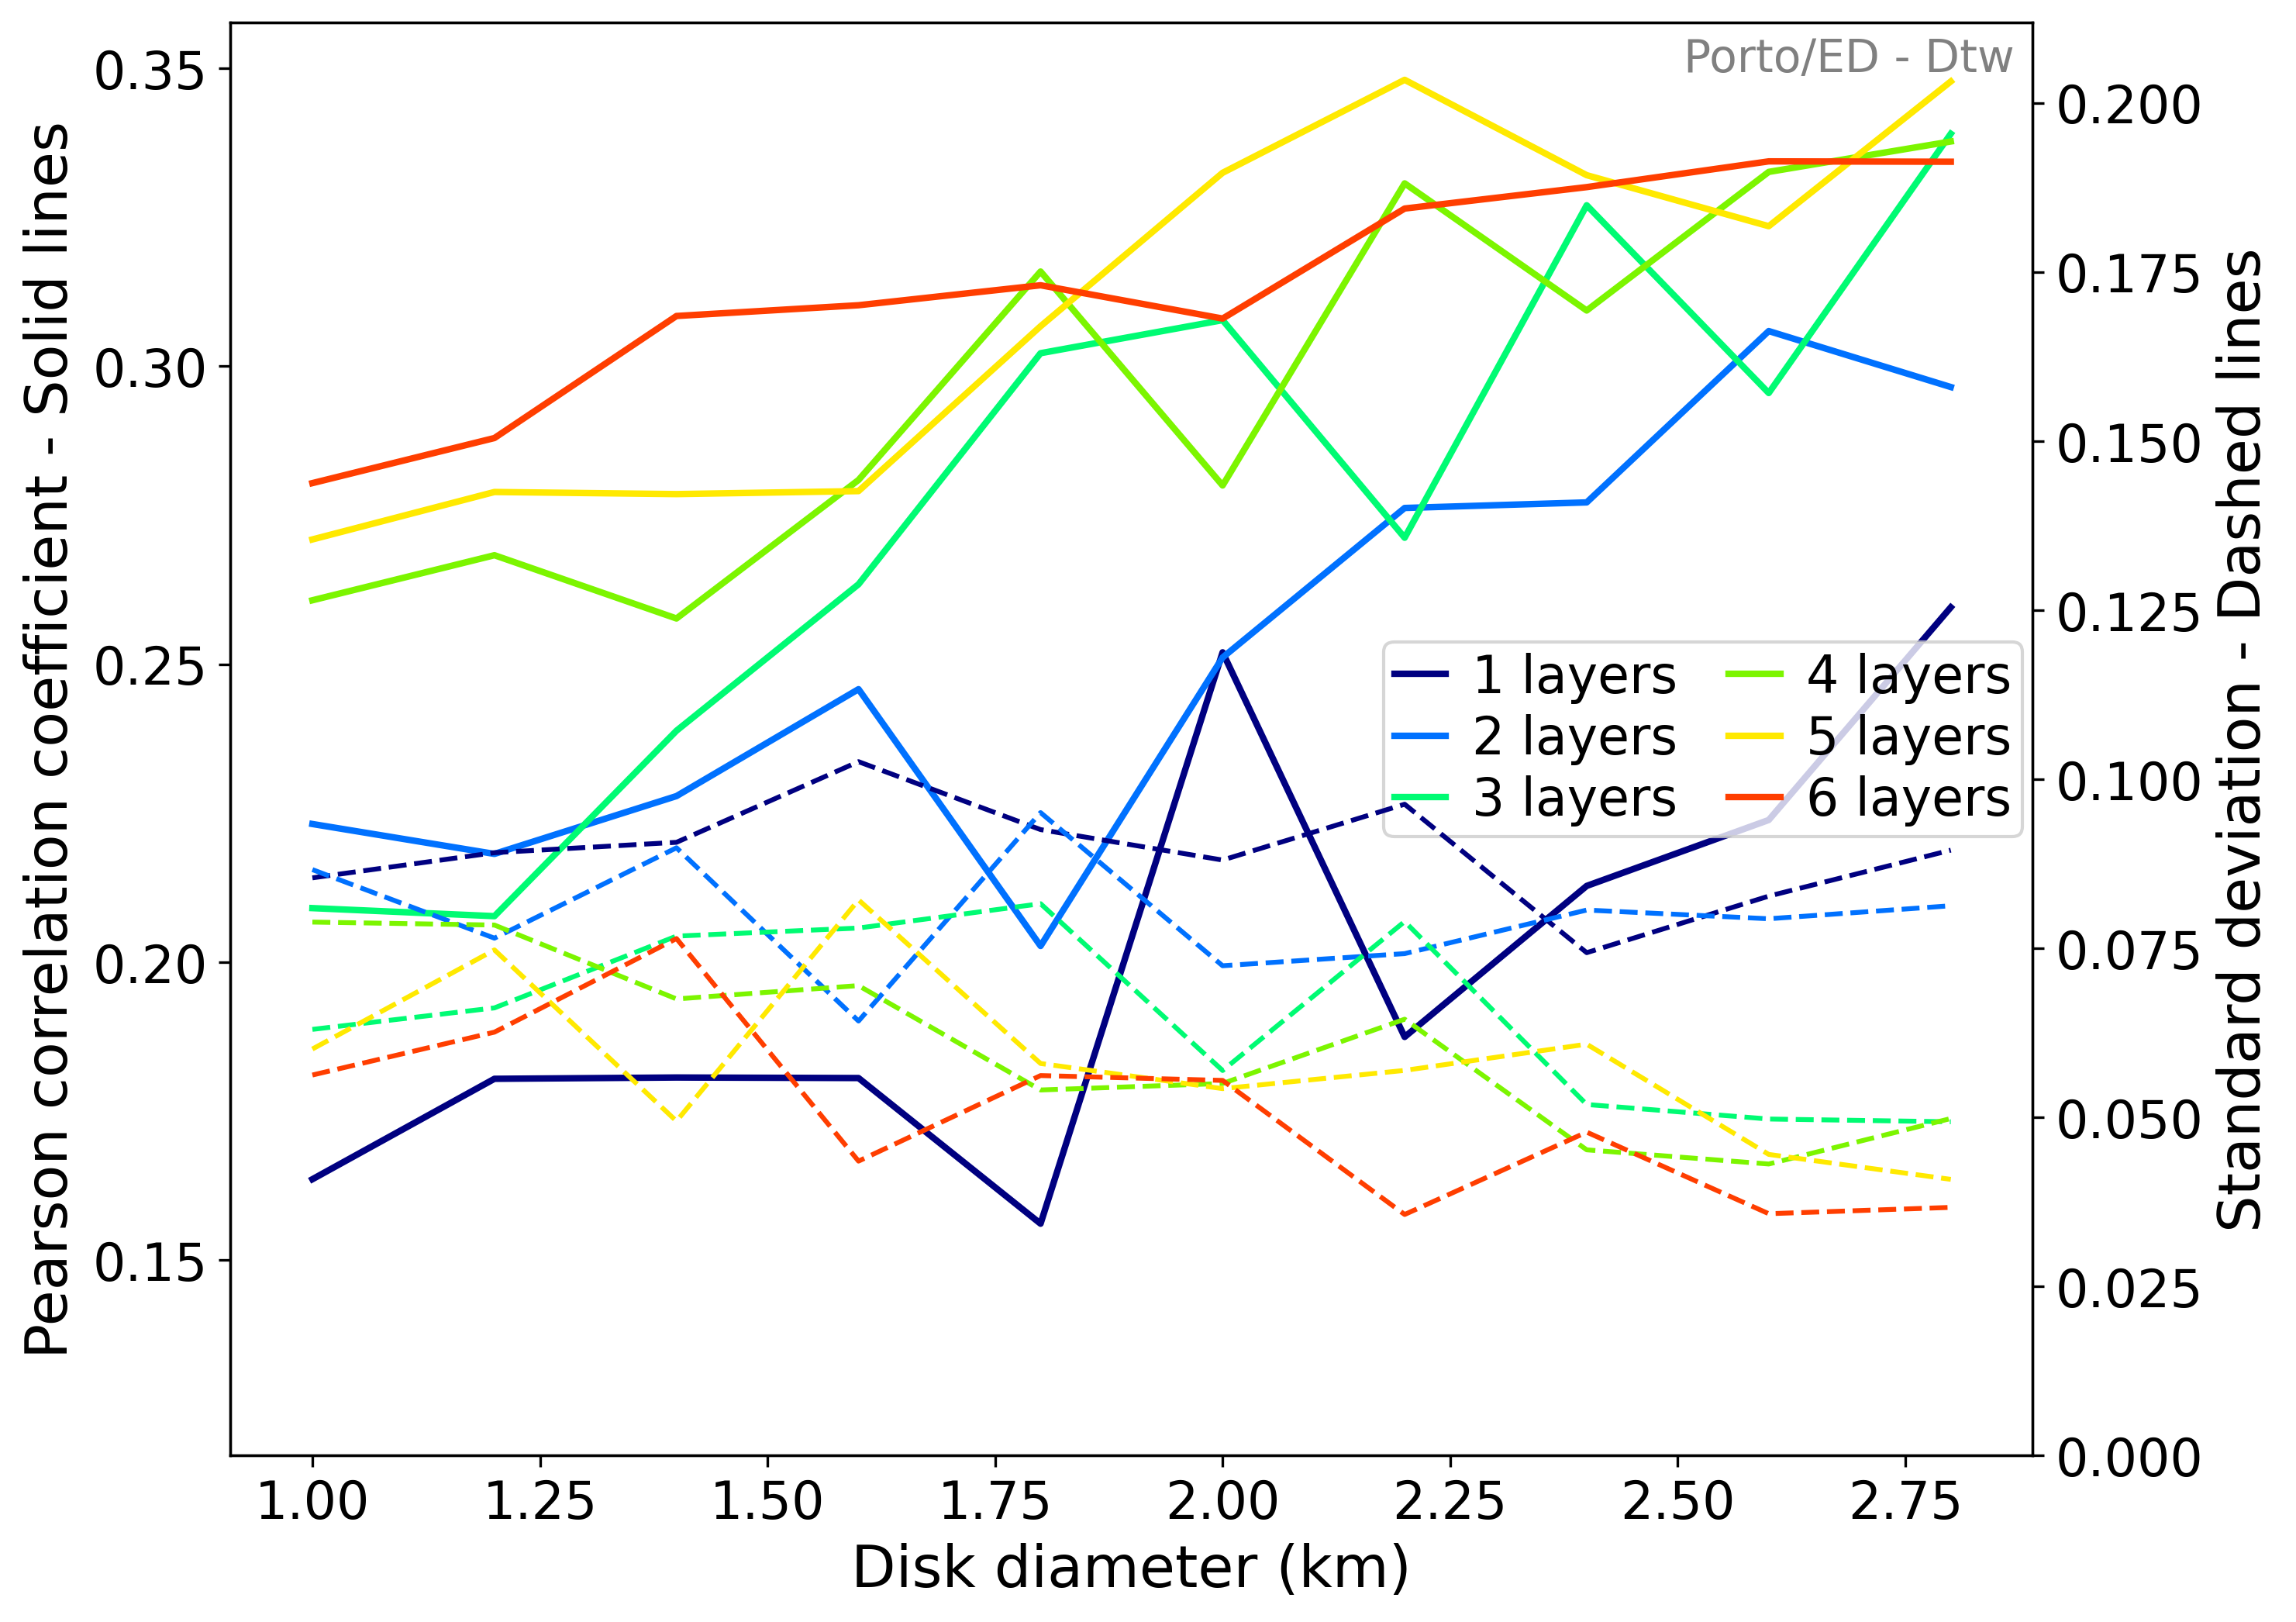

In [9]:
plot_disk_dia_layers("porto", [1,2,3,4,5,6], [1, 3, 0.2], measure="py_ed", reference="dtw", parallell_jobs=20 )

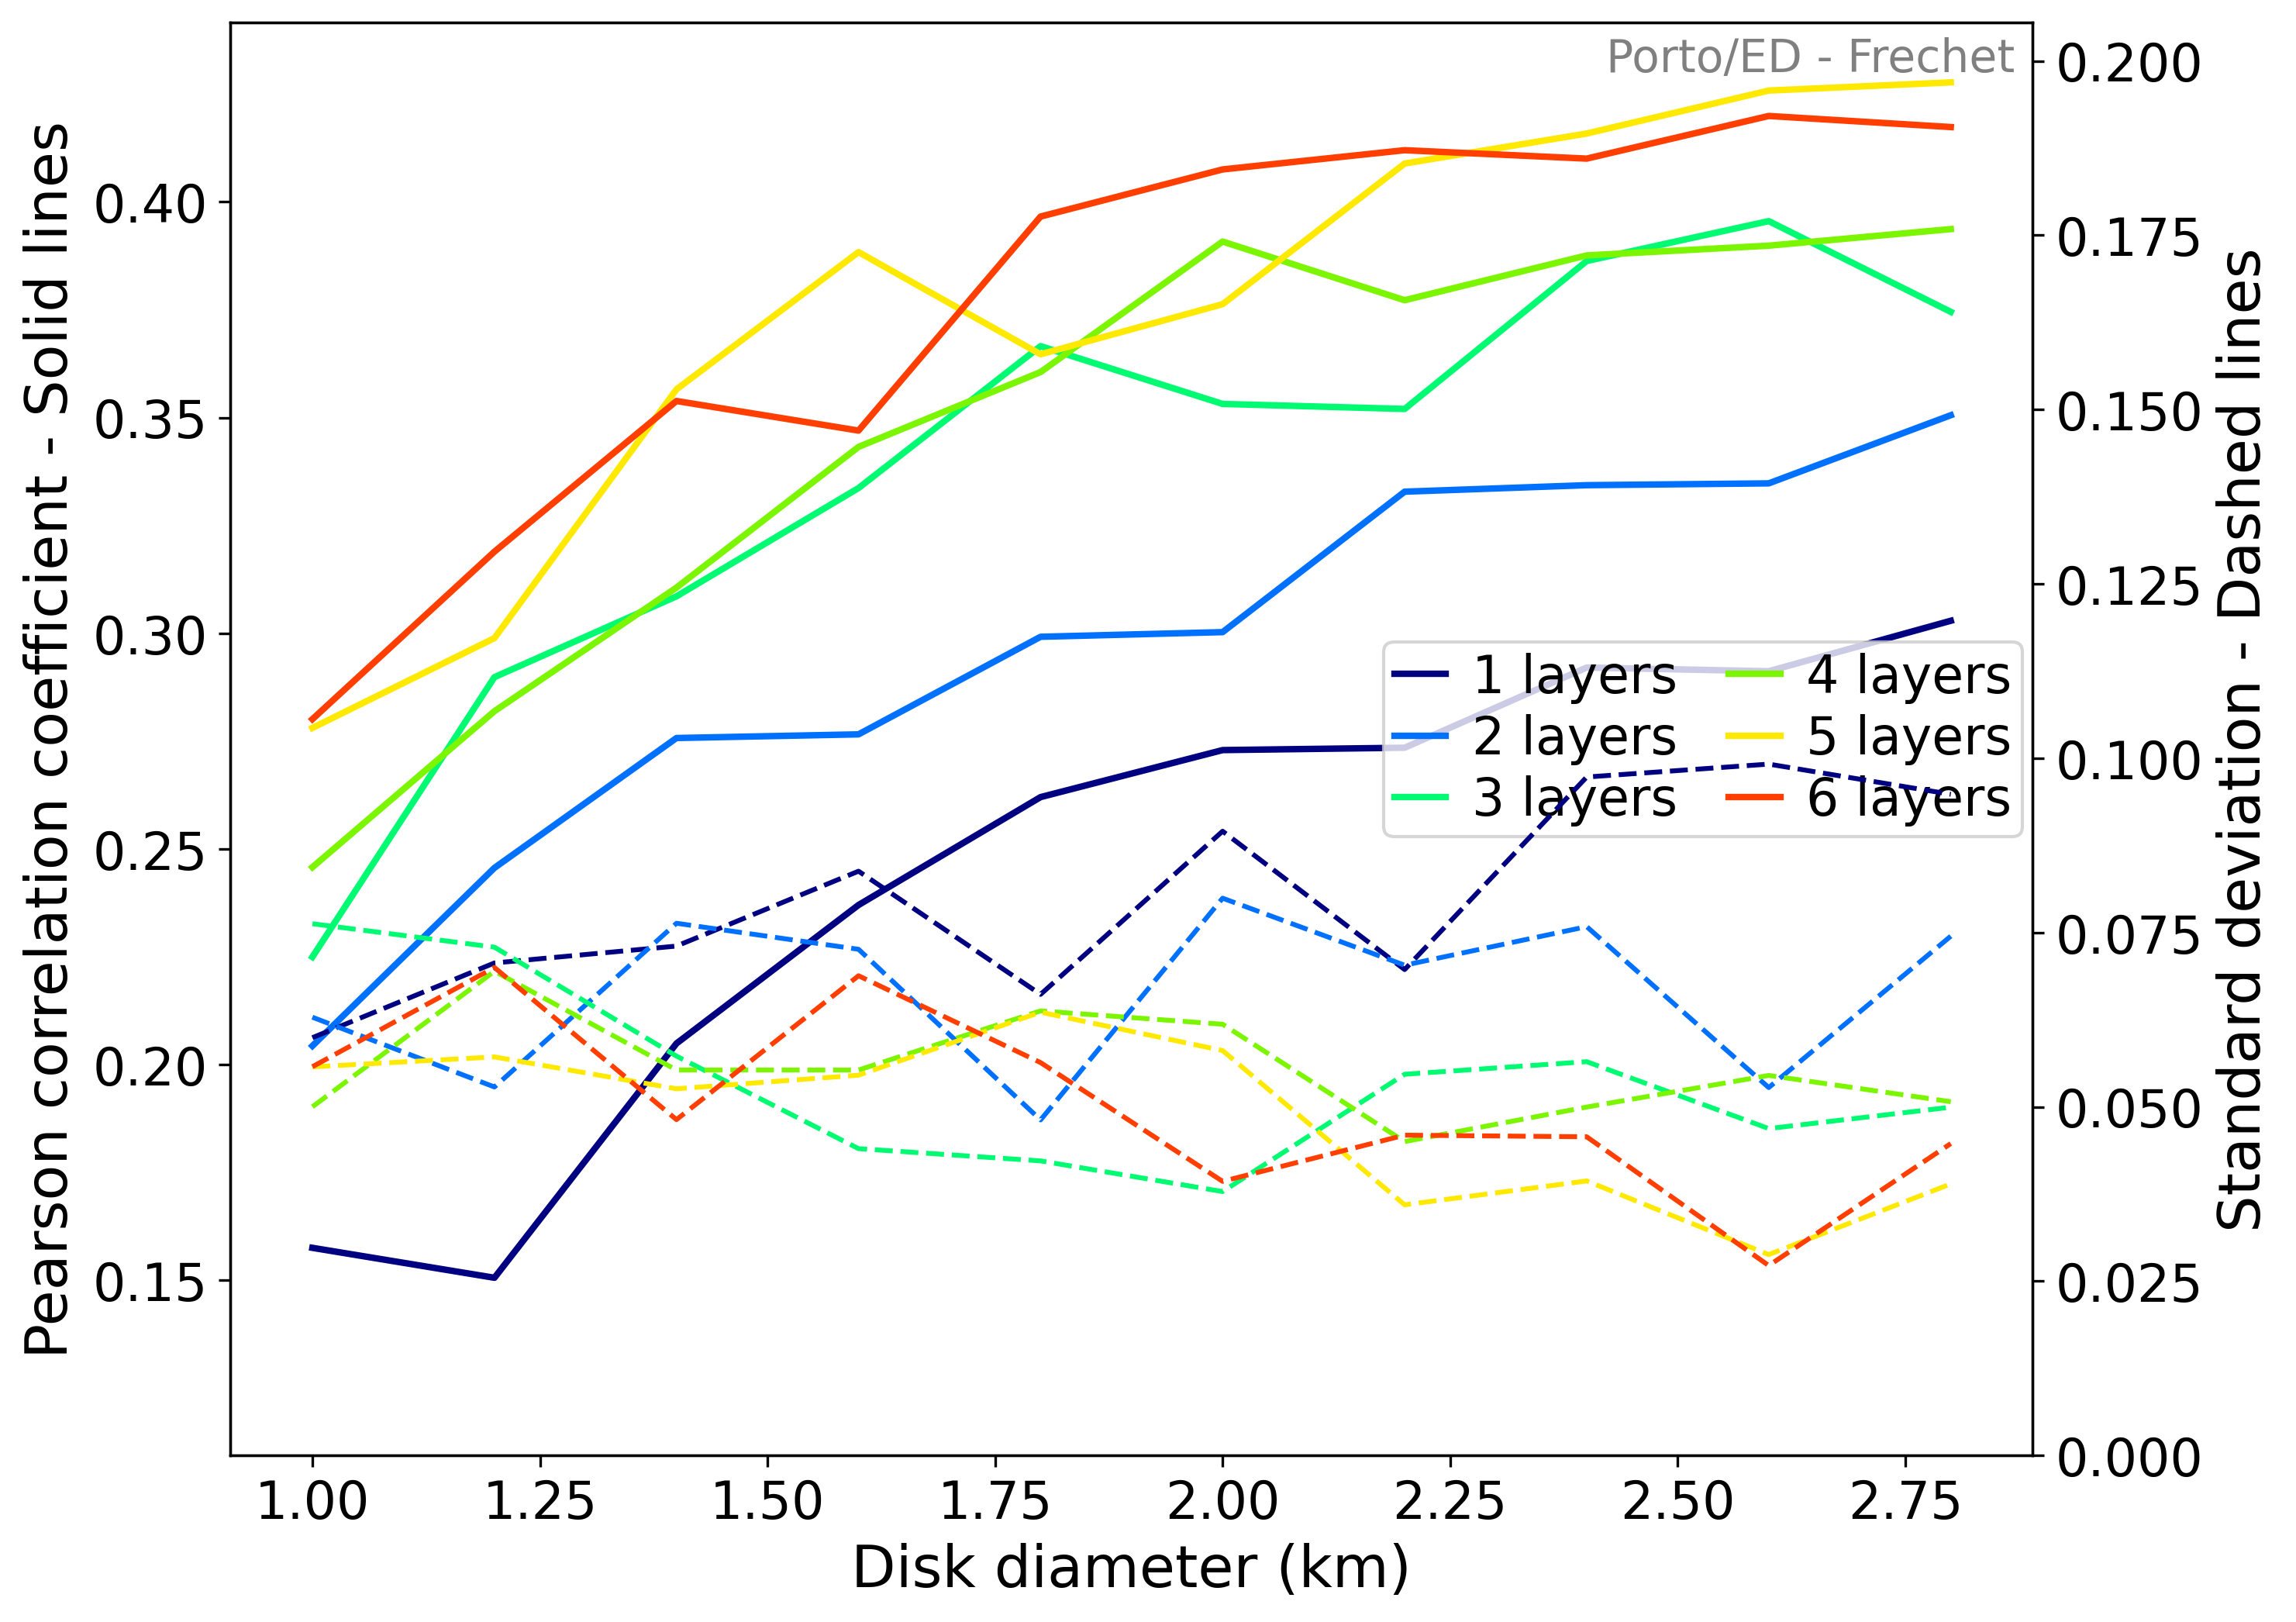

In [10]:
plot_disk_dia_layers("porto", [1,2,3,4,5,6], [1, 3, 0.2], measure="py_ed", reference="frechet", parallell_jobs=20 )

# Plotting disk number figure

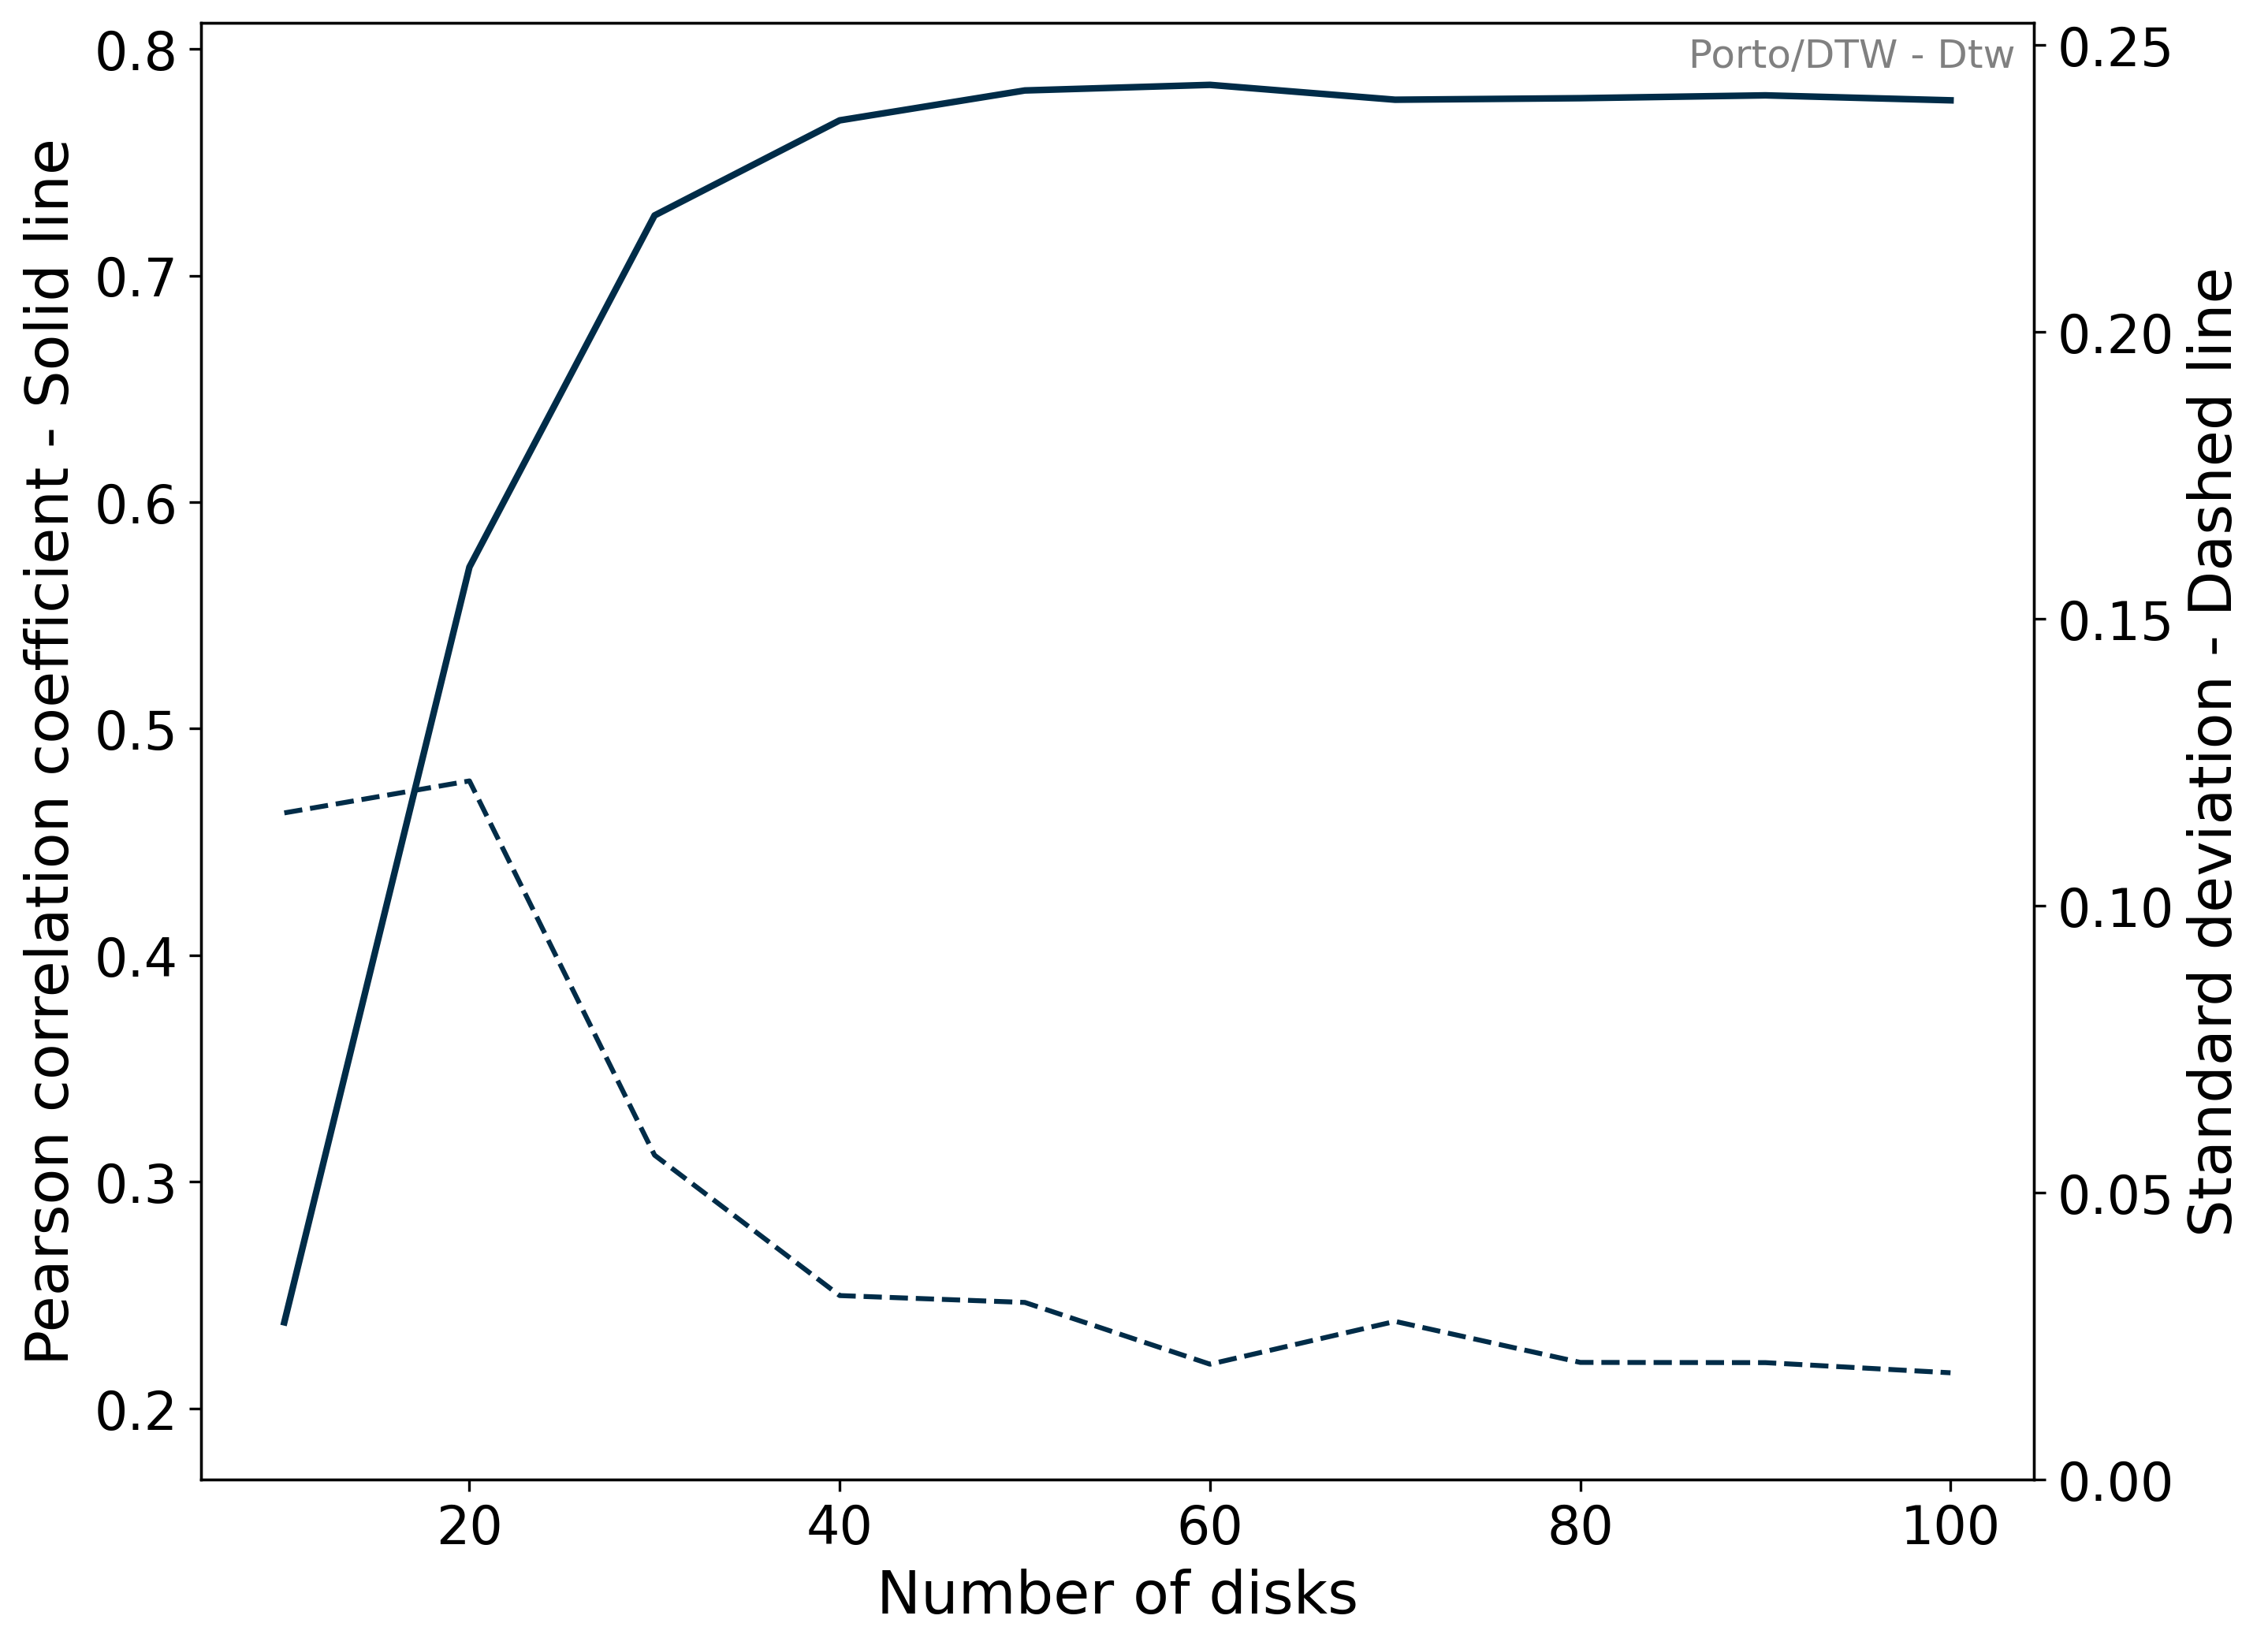

In [11]:
plot_disk_numbers("porto", 4, 2.2, [10,20,30,40,50,60,70,80,90,100], parallell_jobs=30)

# Computing the hash similarities that will be used for further research

In [12]:
from experiments.grid_similarity import generate_grid_hash_similarity
from experiments.disk_similarity import generate_disk_hash_similarity
import os

In [13]:
# Disk Porto
similarities = generate_disk_hash_similarity("porto", 2.2, 4, 60)
output_path = "../code/experiments/similarities/disk_porto.csv"
similarities.to_csv(os.path.abspath(output_path))

# Runtimes of grid similarity computations

In [14]:
from experiments.grid_similarity import measure_grid_hash_similarity_computation_time
from utils.figure_creator import draw_hash_similarity_runtime, draw_hash_similarity_runtime_logarithmic
import pandas as pd
import os
import numpy as np

In [15]:
# Measuring Grid Porto similarity computation times // idun (1node, 6cores, 128GB): 9min

runs = 10
data_sets = range(100,1001,100)
output_folder = "../code/experiments/timing/"
file_name = "similarity_runtimes_grid_porto.csv"

df = pd.DataFrame( index=[f"run_{x+1}" for x in range(runs)], columns=[x for x in data_sets])

for size in data_sets:
    print(f"Computing size {size}", end="\r")
    execution_times = measure_grid_hash_similarity_computation_time("porto", size, 1.6, 5, "dtw", parallell_jobs=10)
    df[size] = execution_times

df.to_csv(os.path.join(output_folder, file_name))
df

[100 200 300 400 500 600 700]


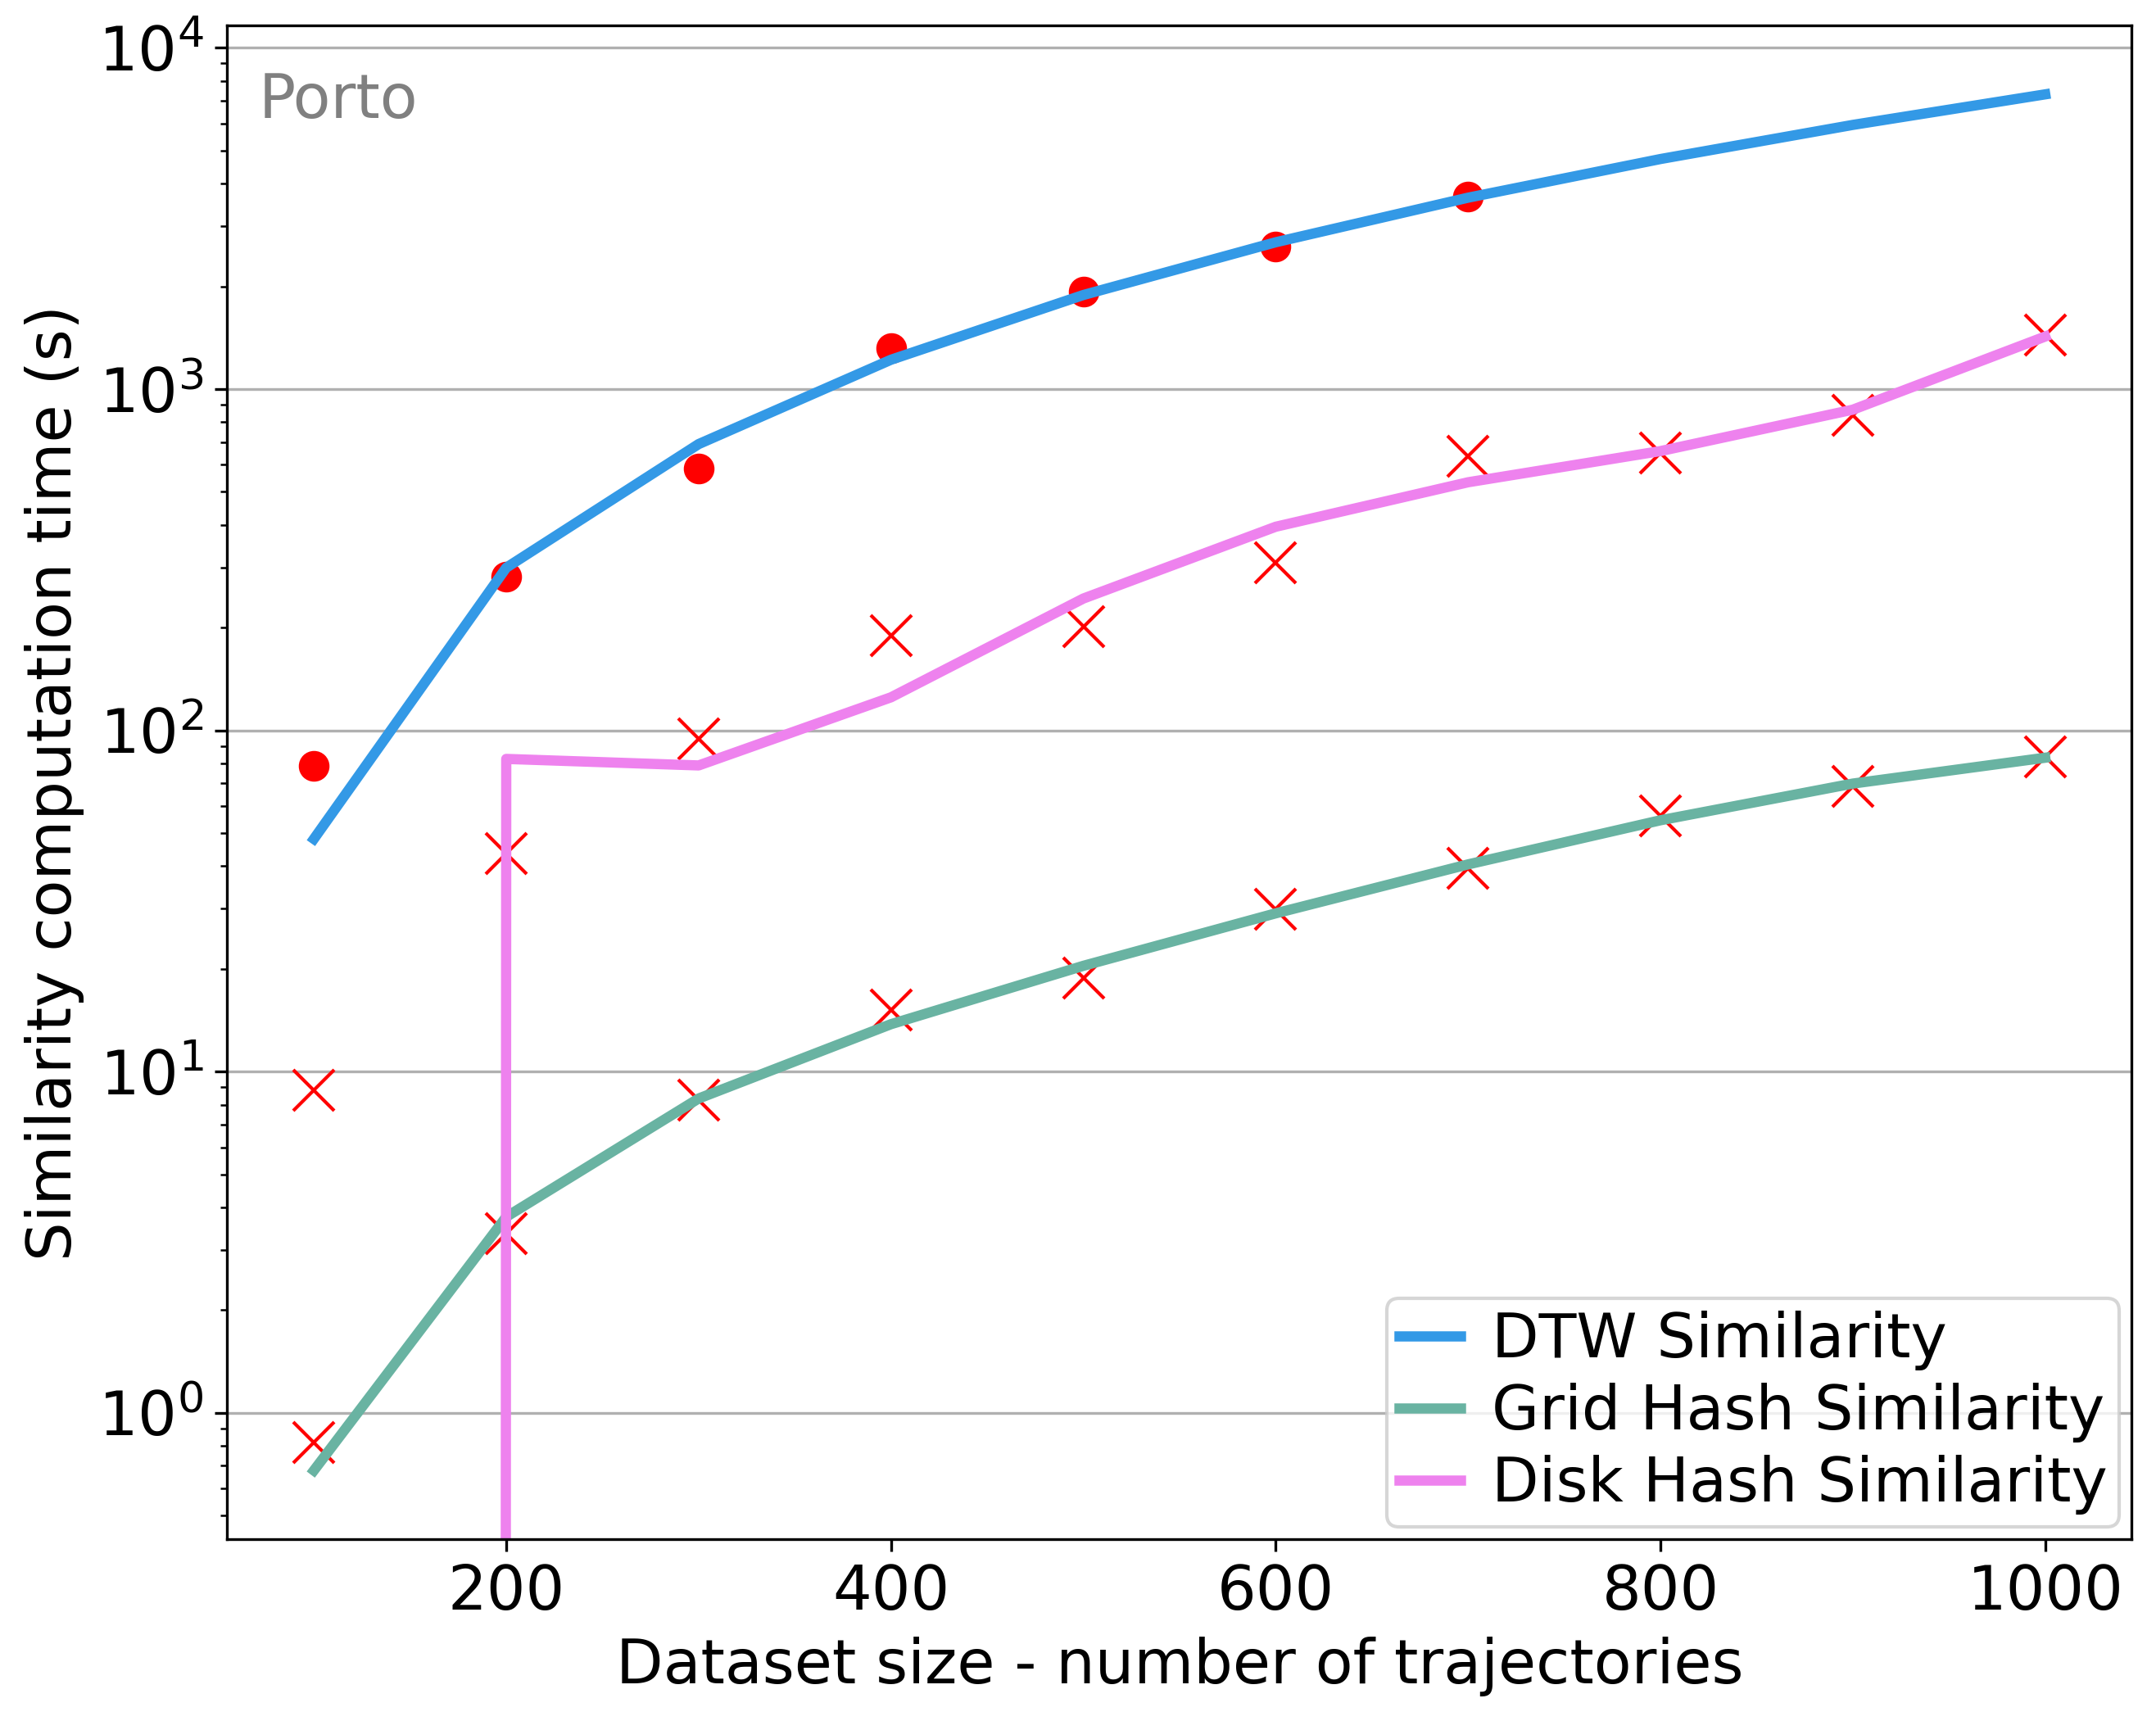

In [ ]:
# Generating a figure visualising the computation runtime of the hashes over Porto
from utils.figure_creator import draw_hash_similarity_runtime_logarithmic
import os
grid_path = os.path.abspath("../code/experiments/timing/similarity_runtimes_grid_porto.csv")
disk_path = os.path.abspath("../code/experiments/timing/similarity_runtimes_disk_porto.csv")
referencepath = os.path.abspath("../code/experiments/timing/similarity_runtimes_true_dtw_porto.csv")
city = "Porto"
draw_hash_similarity_runtime_logarithmic(city, grid_path, disk_path, path_to_reference=referencepath)

# Runtimes of disk similarity computations

In [ ]:
from experiments.disk_similarity import measure_disk_hash_similarity_computation_time
import pandas as pd

In [ ]:
# Measuring Disk Porto similarity computation times // amalie, lokalt: 105min // idun (1node, 6cores, 128GB): 59min

runs = 10
data_sets = range(100,1001,100)
output_folder = "../code/experiments/timing/"
file_name = "similarity_runtimes_disk_porto.csv"

df = pd.DataFrame(index=[f"run_{x+1}" for x in range(runs)], columns=[x for x in data_sets])

for size in data_sets:
    print(f"Computing size {size}", end="\r")
    execution_times = measure_disk_hash_similarity_computation_time("porto", size, 2.2, 4, 60,"kd", measure="dtw", parallell_jobs=10)
    df[size] = execution_times

df.to_csv(os.path.join(output_folder, file_name))
df

100        200        300        400         500         600   \
run_1   5.741492  25.105582  46.397103  74.350174  113.164900  178.783588   
run_2   5.681530  25.292150  46.537934  73.862642  112.851387  178.737034   
run_3   5.738257  25.394642  46.467463  73.541556  113.622387  178.556627   
run_4   5.756689  25.609673  46.466872  73.880839  113.915496  179.414013   
run_5   5.768576  25.014938  46.300977  72.921625  113.935982  179.764064   
run_6   5.704470  25.192370  46.147665  72.598079  114.026960  178.782556   
run_7   5.778454  25.274287  46.241958  73.983475  113.082539  179.139590   
run_8   5.723868  25.154939  46.478211  74.054514  112.736136  181.301922   
run_9   5.686665  25.049743  45.996262  73.682290  113.021379  179.498241   
run_10  5.751129  25.396104  46.076138  73.587679  113.851014  179.685039   

              700         800         900         1000  
run_1   257.808486  295.532029  564.094106  466.657327  
run_2   257.286522  296.709911  566.745496  465.753954  
run_3   256.529814  297.138003  565.784365  467.003947  
run_4   257.086920  297.693103  566.817687  465.393199  
run_5   257.415061  298.465795  565.094954  466.662986  
run_6   258.380581  298.098178  558.374301  466.778405  
run_7   258.347612  296.739608  563.890210  466.237265  
run_8   258.603549  297.440138  560.925509  466.386424  
run_9   258.659199  298.735330  568.647407  464.466234  
run_10  258.102661  298.188475  564.572856  466.075918

# Computing variance from 10 different runs

In [ ]:
from experiments.correlation import compute_correlation_similarity

In [ ]:
compute_correlation_similarity("porto", "grid", 10)

Run : 0
Run : 1
Run : 2
Run : 3
Run : 4
Run : 5
Run : 6
Run : 7
Run : 8
Run : 9
porto grid : (min, max, avg, std)
DTW: 0.4089840468910523 0.4809840742710422 0.4475533487296575 0.01933483300390367
FRE: 0.586089171497779 0.6530787997875429 0.6302832294852069 0.020144614580294023


In [ ]:
# idun(samme): 24min
compute_correlation_similarity("porto", "disk", 10)

Run : 0
Run : 1
Run : 2
Run : 3
Run : 4
Run : 5
Run : 6
Run : 7
Run : 8
Run : 9
porto disk : (min, max, avg, std)
DTW: 0.6204256398736822 0.7188419897252231 0.6623294016323513 0.025696093625659902
FRE: 0.7957352466230481 0.8539103385314621 0.8360271031291207 0.015589752742149965
